In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv") 

In [75]:
df_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [76]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [77]:
print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


In [78]:
# Droping the data points with null values as it's very much less tha 5% of the whole dataset
df_train = df_train.dropna(how = 'any', axis = 0)
df_test = df_test.dropna(how = 'any', axis = 0)

In [79]:
print ("The shape of the train df :",df_train.shape)
print ("The shape of the test df :", df_test.shape)

The shape of the train df : (160398, 7)
The shape of the test df : (53471, 7)


In [80]:
# Merging the test and train data 
merge = [df_train, df_test]
df_data = pd.concat(merge)
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [81]:
df_data.shape

(213869, 7)

In [82]:
df_data.columns = df_data.columns.str.lower()

In [83]:
# Sorting the dataframe
df_data.sort_values(['uniqueid'], ascending = True, inplace = True)
df_data.reset_index(drop = True, inplace = True)

In [84]:
df_data['condition'].isnull().sum(axis = 0)

0

In [85]:
df_data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [86]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [87]:
df_data['condition'].nunique()

916

In [88]:
df_data.loc[df_data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [89]:
df_data.at[df_data['usefulcount'].idxmin(), 'drugname']

'Medroxyprogesterone'

In [90]:
df_data.loc[df_data['rating'] == 0, :].shape

(0, 7)

In [91]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [92]:
df_data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [93]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

### Exploratory Data Analysis

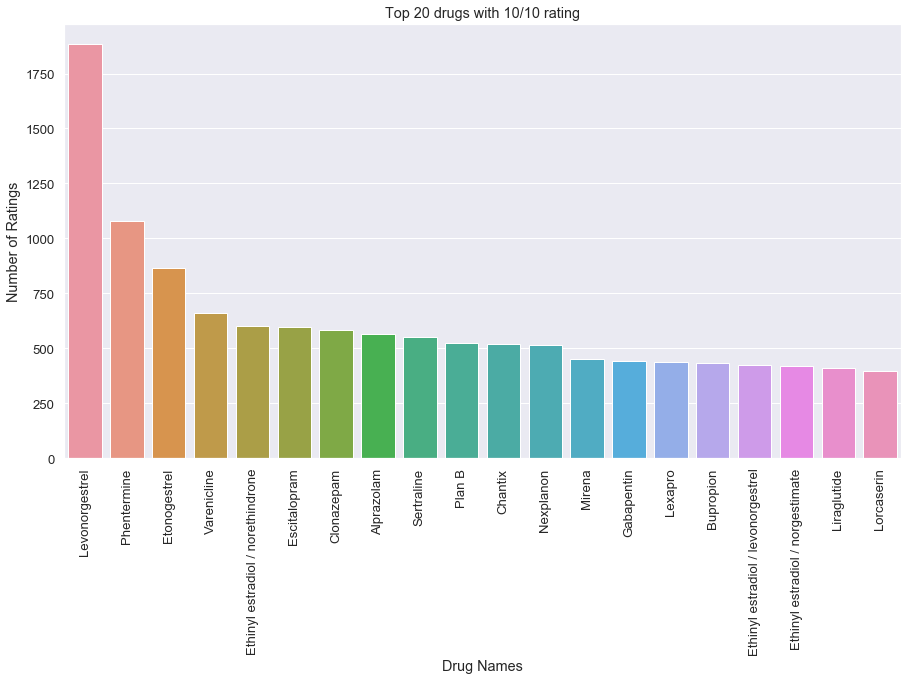

In [94]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

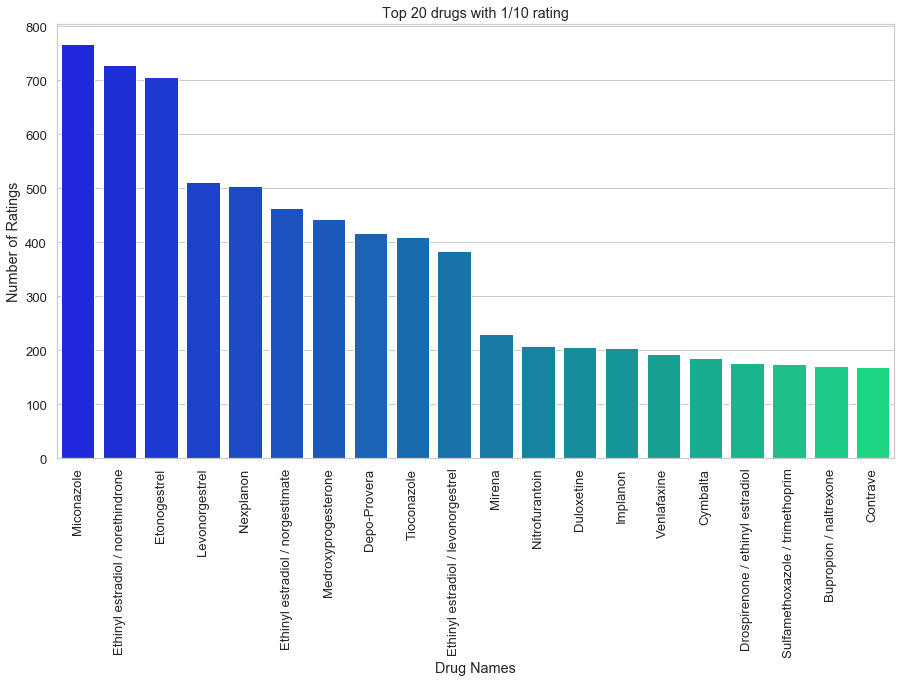

In [95]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

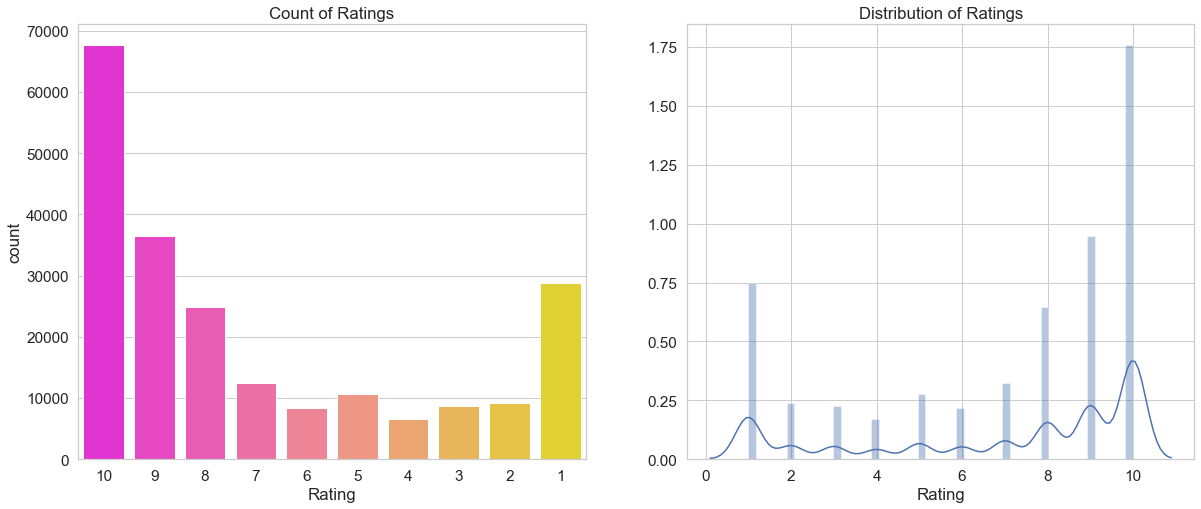

In [96]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

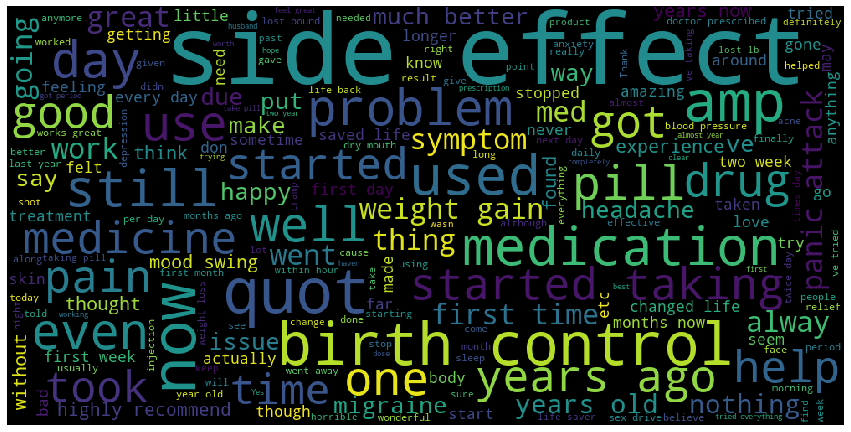

In [97]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

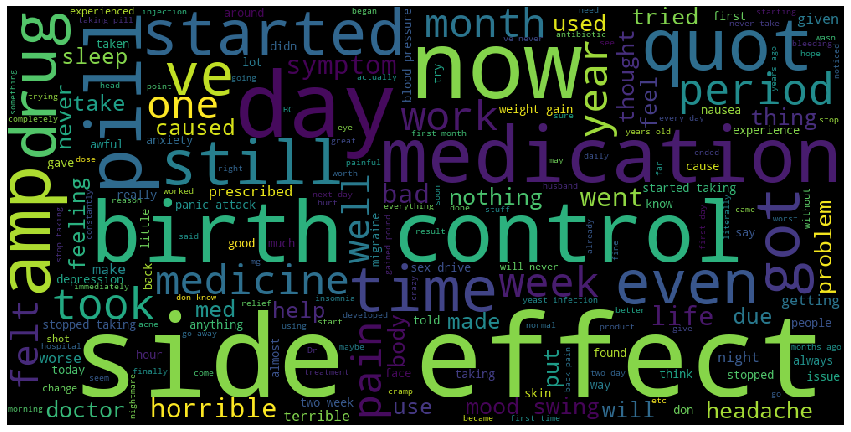

In [98]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

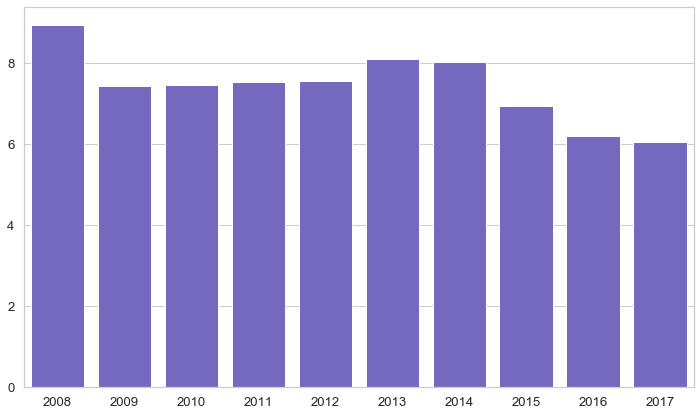

In [99]:
# This barplot shows the mean rating per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');

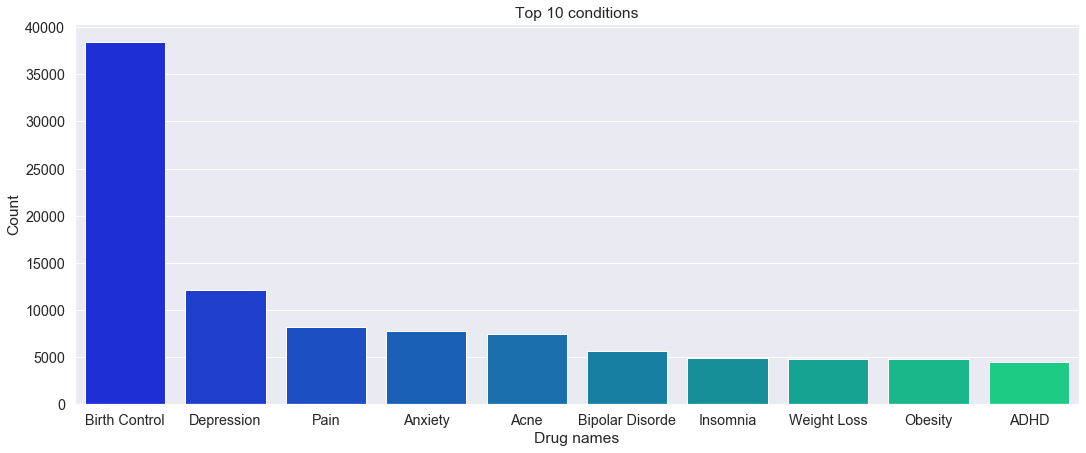

In [100]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Drug names")
sns_.set_ylabel("Count");

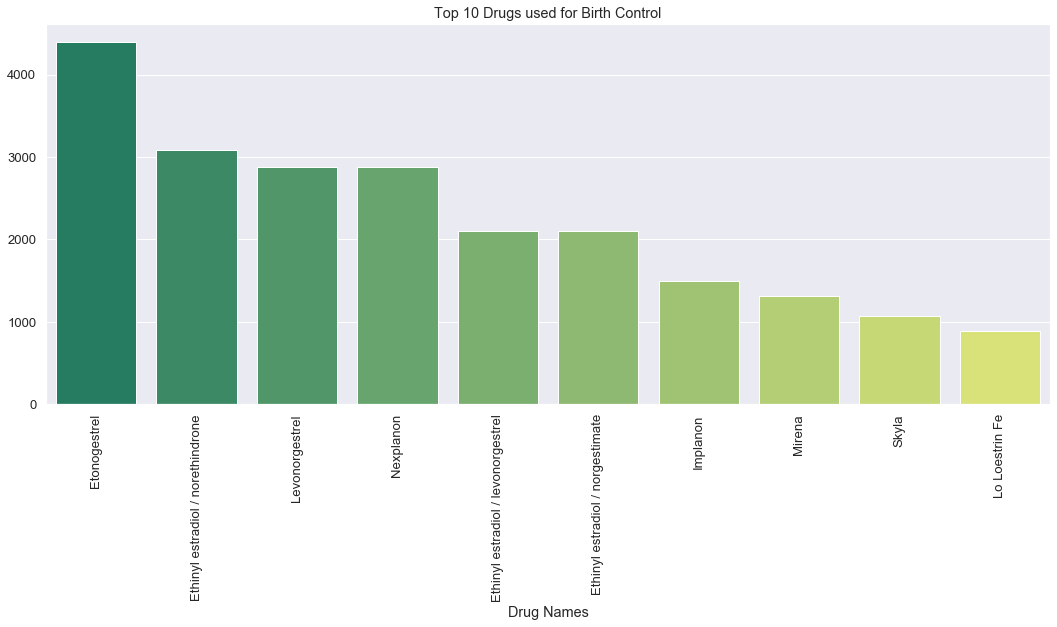

In [101]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

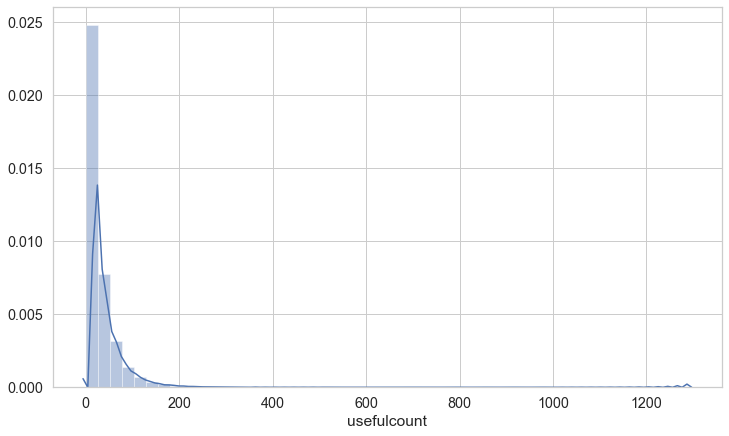

In [102]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(df_data['usefulcount'].dropna())

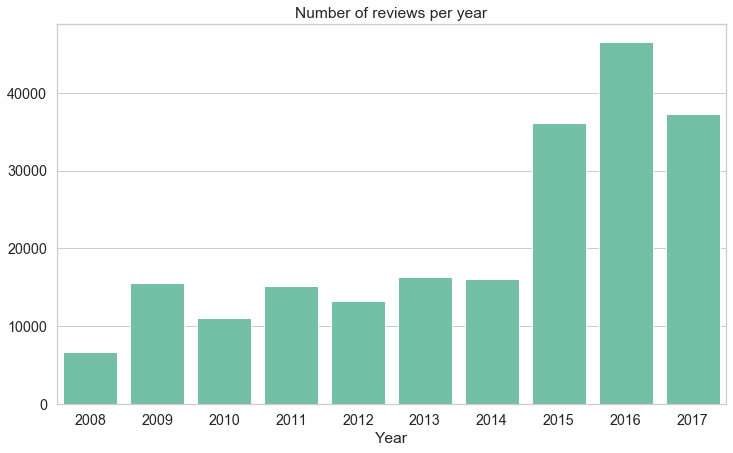

In [103]:
# This barplot shows the number of reviews per year
df = df_data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

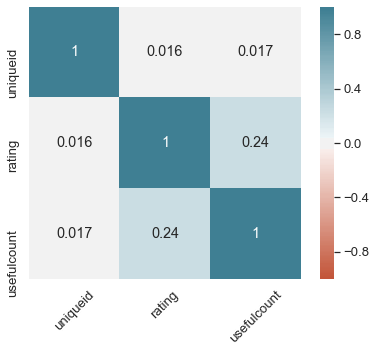

In [110]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);
bottom, top = sns_heat.get_ylim()
sns_heat.set_ylim(bottom + 0.5, top - 0.5);

In [105]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4


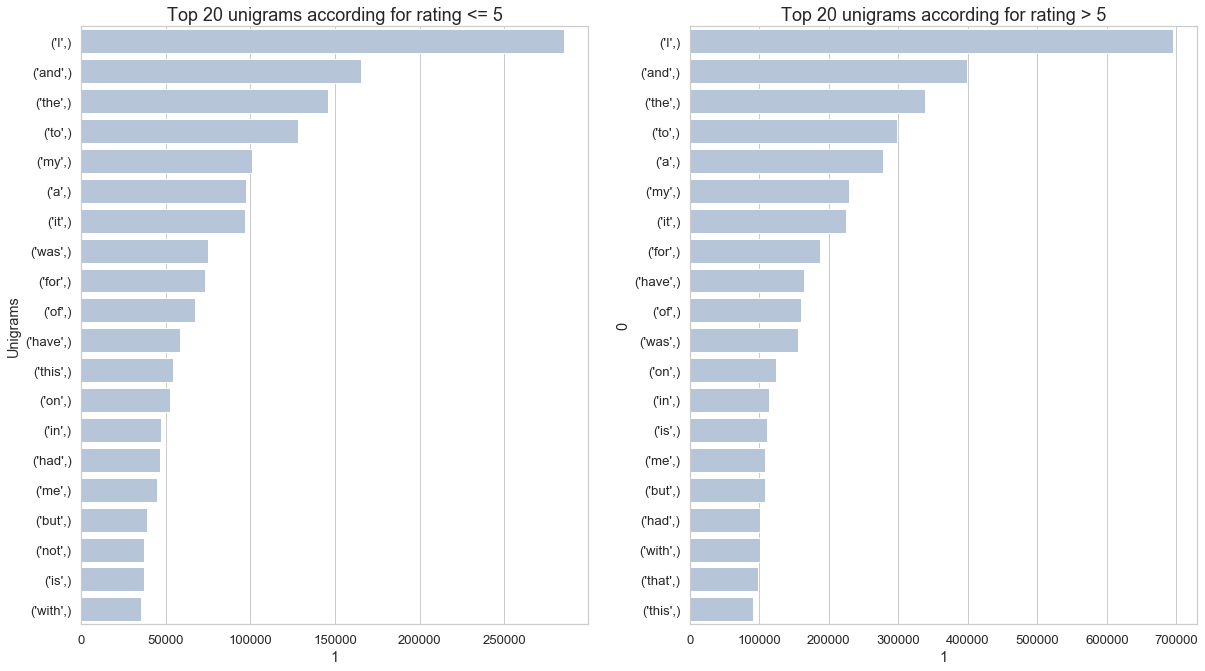

In [145]:
# Top 20 unigrams according to the rating
df_ = df_data[['rating', 'review']]
df_['review'] = df_data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

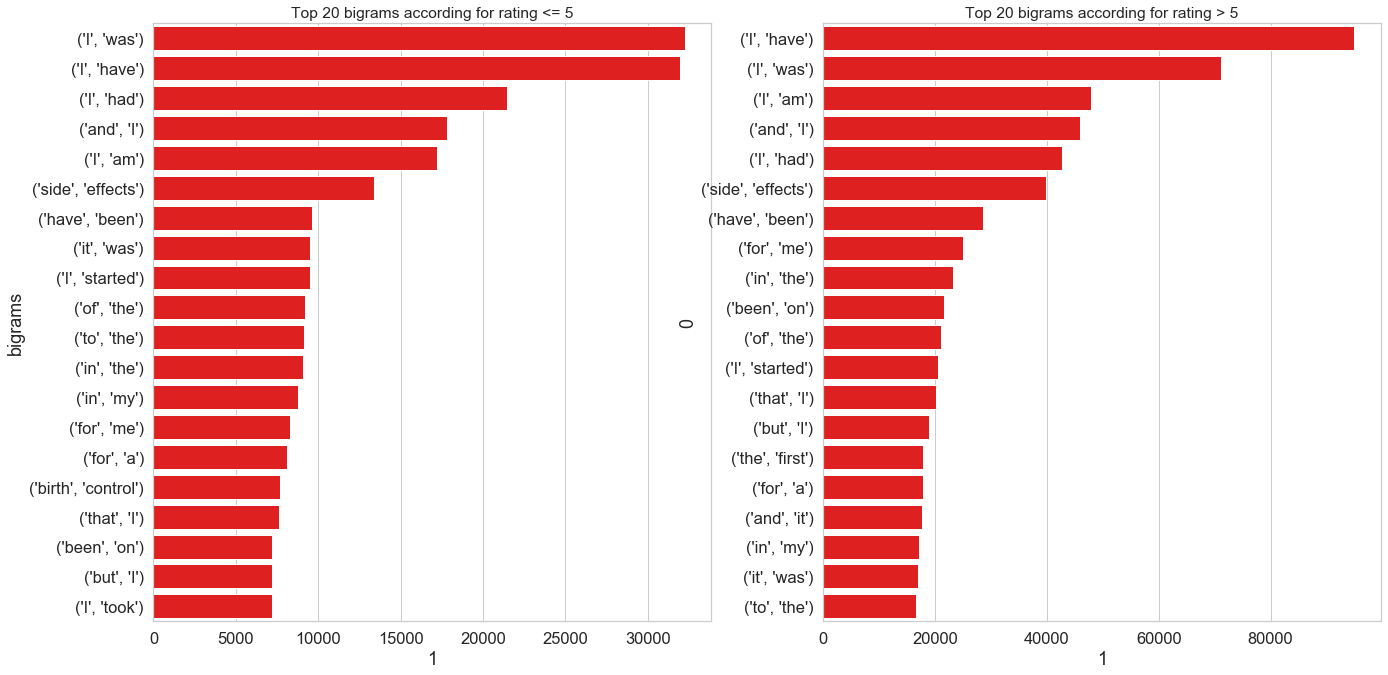

In [107]:
# Top 20 bigrams according to the rating
bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

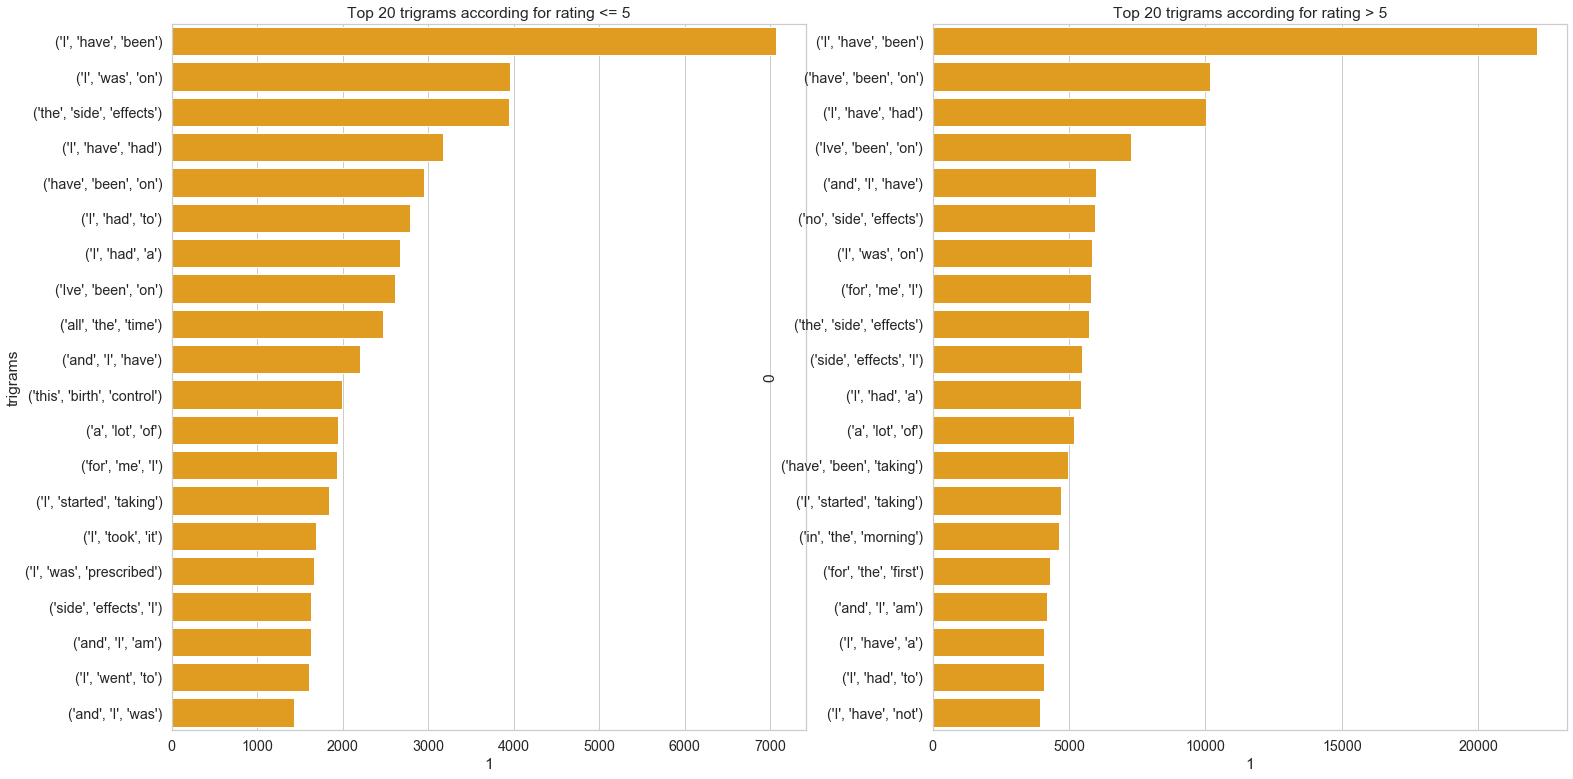

In [108]:
# Top 20 trigrams according to the rating
trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

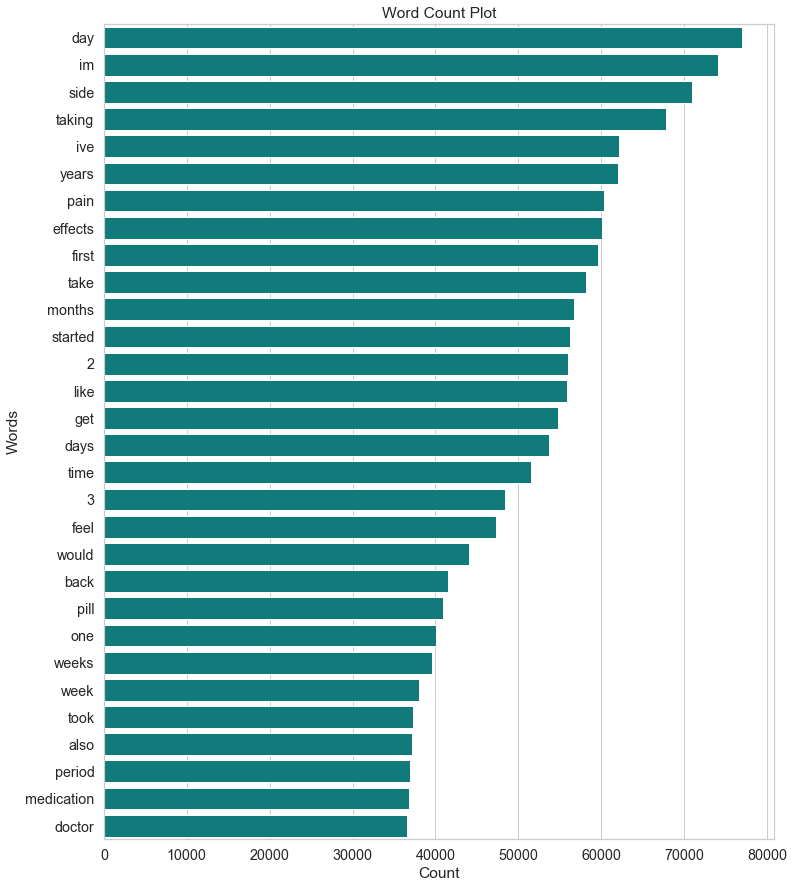

In [109]:
# Word count plot

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

### Preprocessing the reviews for the best polarity and classification

In [111]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [112]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [113]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_data['review_clean'] = review_clean(df_data['review'])

In [114]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [115]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [116]:
df_data['review_clean'][0: 20]

0     depo inject sinc januari 2015 bleed stop anoth...
1     im 21 year old recent found might pcos havent ...
2     shot 11 year month ago never 1 period even spo...
3     ive four shot point birth control pill year du...
4     total 3 shot got first one leav hospit give bi...
5     horribl shot got first shot august ever sinc e...
6     im 18 got heavi bleed ive alway heard bc make ...
7     im 19 heavi pain period sinc forev got depo sh...
8     im 30 year old woman got shot august 9th bleed...
9     im 17 year old got shot august 2015 person don...
10    first month awesom absolut wonder start light ...
11    start depo shot year ago origin bled 3 week da...
12    im 24 ive 2 year quit period last 3 week first...
13    im 17 went depo heavi bleed like heavi would g...
14    love conveni one shot everi three month look b...
15    1st shot sept 2nd nonstop bleed sinc side effe...
16    took shot safe im young teenag sexual activ bi...
17    ive shot 2 year amp one complaint skin cou

In [117]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [118]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [119]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [120]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [121]:
df_data['sentiment'] = sentiment(df_data['review'])

In [122]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

In [123]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

In [124]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.23328393],
       [0.23328393, 1.        ]])

In [125]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [126]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.34600369],
       [0.34600369, 1.        ]])

In [127]:
df_data['condition'].value_counts().head(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

In [128]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015,-0.287798,-0.127381,been on the depo injection since january 2015 ...,-0.160714
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015,0.175357,0.161429,im 21 years old and recently found out i might...,0.175357
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015,-0.210000,0.233333,i have been on the shot 11 years and until a m...,-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015,-0.022500,0.069444,ive had four shots at this point i was on birt...,-0.033333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015,0.044872,0.103333,i had a total of 3 shots i got my first one be...,0.044872
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,0,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,0.013235,this is a horrible shot i got my first shot in...,0.000321
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,0,im 18 got heavi bleed ive alway heard bc make ...,22,10,2015,-0.056692,0.098052,im 18 and got this for heavy bleeding ive alwa...,-0.065025
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,0,im 19 heavi pain period sinc forev got depo sh...,21,10,2015,0.030995,0.068750,im 19 and have been having heavy and painful p...,0.026923
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0,im 30 year old woman got shot august 9th bleed...,21,10,2015,0.265309,0.288889,im a 30 year old woman i got the shot on augus...,0.265309
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1,im 17 year old got shot august 2015 person don...,20,10,2015,-0.047222,-0.022500,im 17 years old and i got shot in august 2015 ...,-0.047222


### Feature Engineering

In [129]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [130]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

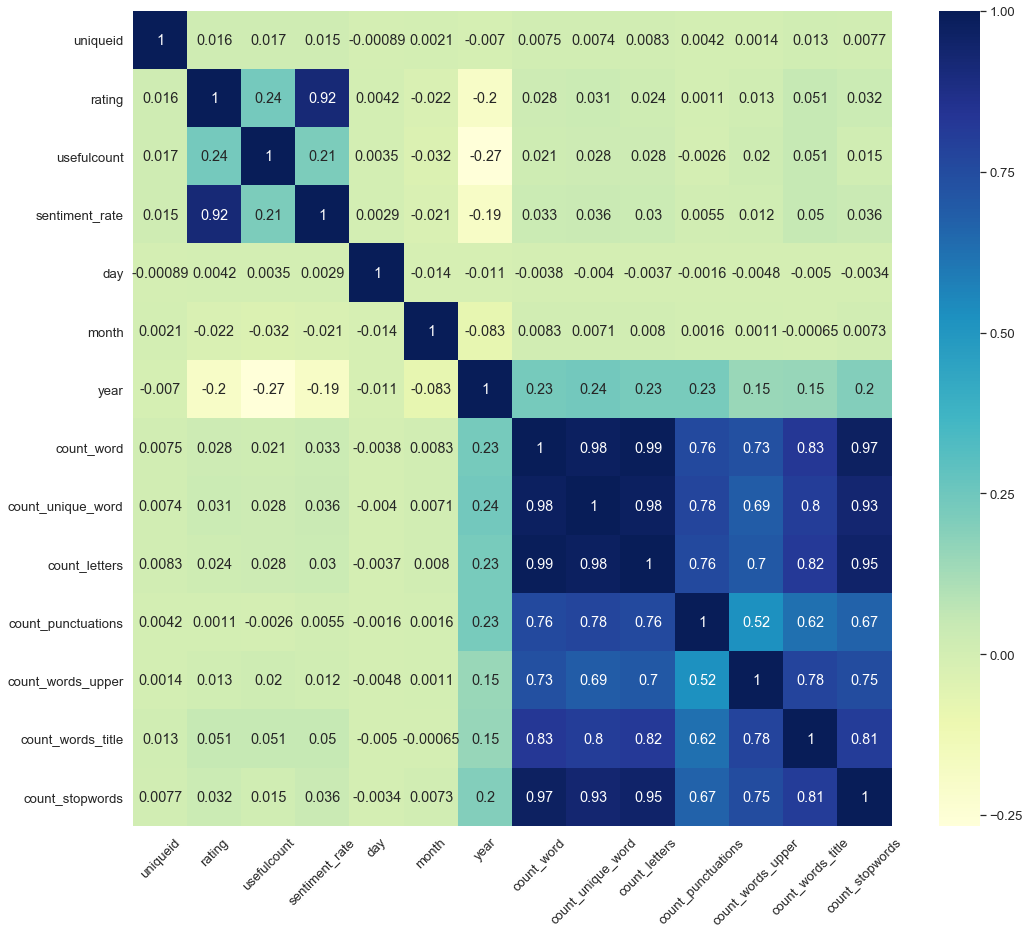

In [135]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);
bottom, top = sns_.get_ylim()
sns_.set_ylim(bottom + 0.5, top - 0.5);

In [136]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

### Modelling

In [137]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [138]:
# Defining Features and splitting the data as train and test set

features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


Model - I LightGBM

In [139]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8879069839933916
The confusion Matrix is 


array([[14794,  4551],
       [ 2641, 42175]], dtype=int64)

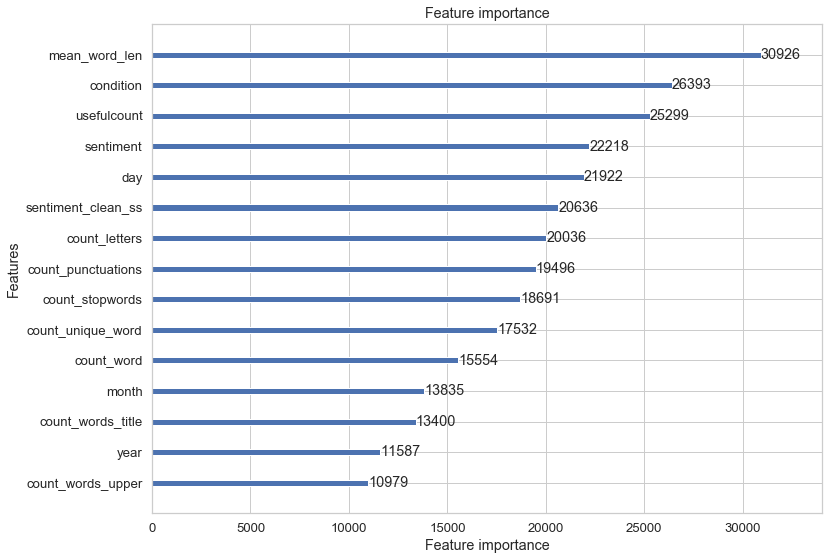

In [140]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

Model - II XGBClassifier

In [141]:
# Training Model - II
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

The Accuracy of the model is :  0.7582176088277925
The confusion Matrix is 


array([[ 7374, 11971],
       [ 3542, 41274]], dtype=int64)

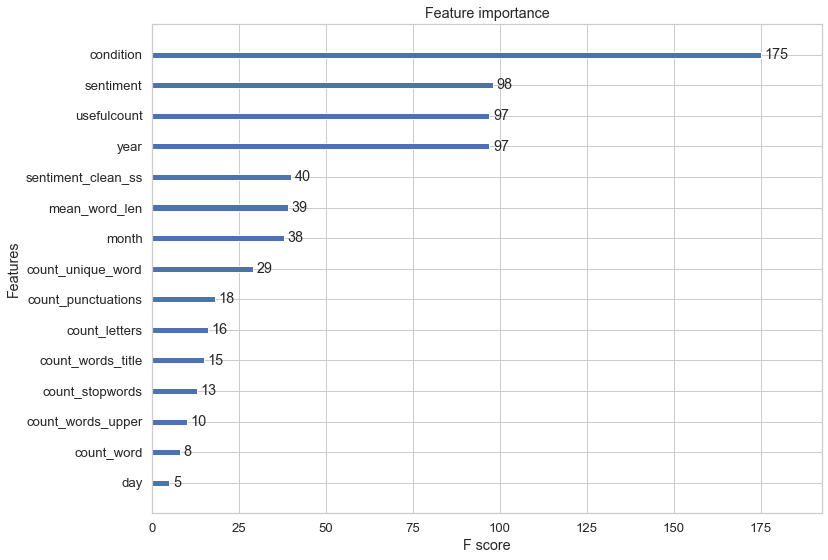

In [142]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

Model - III CatBoostClassifier

In [160]:
# Training Model - III
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train)

0:	learn: 0.5609381	total: 29.5ms	remaining: 4m 54s
1:	learn: 0.5277483	total: 52.7ms	remaining: 4m 23s
2:	learn: 0.5150090	total: 77.1ms	remaining: 4m 17s
3:	learn: 0.5104798	total: 101ms	remaining: 4m 11s
4:	learn: 0.5067295	total: 121ms	remaining: 4m 2s
5:	learn: 0.5043203	total: 144ms	remaining: 4m
6:	learn: 0.5020393	total: 166ms	remaining: 3m 57s
7:	learn: 0.5005295	total: 191ms	remaining: 3m 58s
8:	learn: 0.4987541	total: 215ms	remaining: 3m 58s
9:	learn: 0.4973832	total: 242ms	remaining: 4m 2s
10:	learn: 0.4965061	total: 267ms	remaining: 4m 2s
11:	learn: 0.4954493	total: 291ms	remaining: 4m 2s
12:	learn: 0.4946065	total: 319ms	remaining: 4m 4s
13:	learn: 0.4933793	total: 345ms	remaining: 4m 6s
14:	learn: 0.4928104	total: 369ms	remaining: 4m 5s
15:	learn: 0.4918410	total: 396ms	remaining: 4m 6s
16:	learn: 0.4912259	total: 420ms	remaining: 4m 6s
17:	learn: 0.4905870	total: 444ms	remaining: 4m 5s
18:	learn: 0.4896518	total: 464ms	remaining: 4m 3s
19:	learn: 0.4892999	total: 488ms	

161:	learn: 0.4348405	total: 4.02s	remaining: 4m 4s
162:	learn: 0.4345789	total: 4.04s	remaining: 4m 3s
163:	learn: 0.4344022	total: 4.07s	remaining: 4m 3s
164:	learn: 0.4341319	total: 4.09s	remaining: 4m 3s
165:	learn: 0.4338882	total: 4.12s	remaining: 4m 3s
166:	learn: 0.4336428	total: 4.14s	remaining: 4m 3s
167:	learn: 0.4334298	total: 4.17s	remaining: 4m 3s
168:	learn: 0.4332130	total: 4.19s	remaining: 4m 3s
169:	learn: 0.4329604	total: 4.21s	remaining: 4m 3s
170:	learn: 0.4327333	total: 4.24s	remaining: 4m 3s
171:	learn: 0.4326249	total: 4.26s	remaining: 4m 3s
172:	learn: 0.4323797	total: 4.28s	remaining: 4m 3s
173:	learn: 0.4320510	total: 4.31s	remaining: 4m 3s
174:	learn: 0.4318028	total: 4.33s	remaining: 4m 3s
175:	learn: 0.4314156	total: 4.35s	remaining: 4m 2s
176:	learn: 0.4311688	total: 4.38s	remaining: 4m 2s
177:	learn: 0.4308659	total: 4.4s	remaining: 4m 3s
178:	learn: 0.4305500	total: 4.43s	remaining: 4m 3s
179:	learn: 0.4303932	total: 4.45s	remaining: 4m 2s
180:	learn: 0

321:	learn: 0.3966815	total: 7.83s	remaining: 3m 55s
322:	learn: 0.3964093	total: 7.86s	remaining: 3m 55s
323:	learn: 0.3961635	total: 7.88s	remaining: 3m 55s
324:	learn: 0.3958978	total: 7.9s	remaining: 3m 55s
325:	learn: 0.3956857	total: 7.93s	remaining: 3m 55s
326:	learn: 0.3954732	total: 7.95s	remaining: 3m 55s
327:	learn: 0.3952382	total: 7.97s	remaining: 3m 55s
328:	learn: 0.3950444	total: 8s	remaining: 3m 55s
329:	learn: 0.3948036	total: 8.02s	remaining: 3m 55s
330:	learn: 0.3945332	total: 8.05s	remaining: 3m 55s
331:	learn: 0.3942656	total: 8.07s	remaining: 3m 54s
332:	learn: 0.3939829	total: 8.09s	remaining: 3m 54s
333:	learn: 0.3937363	total: 8.12s	remaining: 3m 54s
334:	learn: 0.3935604	total: 8.14s	remaining: 3m 54s
335:	learn: 0.3934386	total: 8.16s	remaining: 3m 54s
336:	learn: 0.3932330	total: 8.19s	remaining: 3m 54s
337:	learn: 0.3929521	total: 8.21s	remaining: 3m 54s
338:	learn: 0.3927870	total: 8.24s	remaining: 3m 54s
339:	learn: 0.3925768	total: 8.26s	remaining: 3m 5

479:	learn: 0.3646235	total: 11.6s	remaining: 3m 50s
480:	learn: 0.3644424	total: 11.6s	remaining: 3m 50s
481:	learn: 0.3642787	total: 11.7s	remaining: 3m 50s
482:	learn: 0.3640777	total: 11.7s	remaining: 3m 50s
483:	learn: 0.3638914	total: 11.7s	remaining: 3m 50s
484:	learn: 0.3636668	total: 11.7s	remaining: 3m 50s
485:	learn: 0.3634361	total: 11.8s	remaining: 3m 50s
486:	learn: 0.3633299	total: 11.8s	remaining: 3m 50s
487:	learn: 0.3631117	total: 11.8s	remaining: 3m 50s
488:	learn: 0.3628480	total: 11.8s	remaining: 3m 50s
489:	learn: 0.3626921	total: 11.9s	remaining: 3m 50s
490:	learn: 0.3625199	total: 11.9s	remaining: 3m 50s
491:	learn: 0.3622930	total: 11.9s	remaining: 3m 50s
492:	learn: 0.3619864	total: 11.9s	remaining: 3m 49s
493:	learn: 0.3617571	total: 11.9s	remaining: 3m 49s
494:	learn: 0.3615907	total: 12s	remaining: 3m 49s
495:	learn: 0.3613784	total: 12s	remaining: 3m 49s
496:	learn: 0.3611590	total: 12s	remaining: 3m 49s
497:	learn: 0.3609559	total: 12s	remaining: 3m 49s
4

640:	learn: 0.3360854	total: 15.4s	remaining: 3m 45s
641:	learn: 0.3359467	total: 15.5s	remaining: 3m 45s
642:	learn: 0.3358053	total: 15.5s	remaining: 3m 45s
643:	learn: 0.3356815	total: 15.5s	remaining: 3m 45s
644:	learn: 0.3355428	total: 15.5s	remaining: 3m 45s
645:	learn: 0.3353895	total: 15.6s	remaining: 3m 45s
646:	learn: 0.3352213	total: 15.6s	remaining: 3m 45s
647:	learn: 0.3350057	total: 15.6s	remaining: 3m 45s
648:	learn: 0.3348514	total: 15.6s	remaining: 3m 45s
649:	learn: 0.3346669	total: 15.7s	remaining: 3m 45s
650:	learn: 0.3345178	total: 15.7s	remaining: 3m 45s
651:	learn: 0.3343244	total: 15.7s	remaining: 3m 45s
652:	learn: 0.3341538	total: 15.7s	remaining: 3m 45s
653:	learn: 0.3339943	total: 15.8s	remaining: 3m 45s
654:	learn: 0.3338125	total: 15.8s	remaining: 3m 45s
655:	learn: 0.3336178	total: 15.8s	remaining: 3m 45s
656:	learn: 0.3334589	total: 15.8s	remaining: 3m 45s
657:	learn: 0.3332953	total: 15.9s	remaining: 3m 45s
658:	learn: 0.3331699	total: 15.9s	remaining: 

798:	learn: 0.3113205	total: 19.2s	remaining: 3m 41s
799:	learn: 0.3111818	total: 19.2s	remaining: 3m 41s
800:	learn: 0.3110233	total: 19.3s	remaining: 3m 41s
801:	learn: 0.3108904	total: 19.3s	remaining: 3m 41s
802:	learn: 0.3106760	total: 19.3s	remaining: 3m 41s
803:	learn: 0.3105698	total: 19.3s	remaining: 3m 41s
804:	learn: 0.3103962	total: 19.4s	remaining: 3m 41s
805:	learn: 0.3102857	total: 19.4s	remaining: 3m 41s
806:	learn: 0.3101323	total: 19.4s	remaining: 3m 41s
807:	learn: 0.3098831	total: 19.4s	remaining: 3m 40s
808:	learn: 0.3097283	total: 19.4s	remaining: 3m 40s
809:	learn: 0.3095889	total: 19.5s	remaining: 3m 40s
810:	learn: 0.3094801	total: 19.5s	remaining: 3m 40s
811:	learn: 0.3093779	total: 19.5s	remaining: 3m 40s
812:	learn: 0.3092610	total: 19.5s	remaining: 3m 40s
813:	learn: 0.3090824	total: 19.6s	remaining: 3m 40s
814:	learn: 0.3088863	total: 19.6s	remaining: 3m 40s
815:	learn: 0.3087820	total: 19.6s	remaining: 3m 40s
816:	learn: 0.3087309	total: 19.6s	remaining: 

958:	learn: 0.2889811	total: 23s	remaining: 3m 37s
959:	learn: 0.2888168	total: 23.1s	remaining: 3m 37s
960:	learn: 0.2886644	total: 23.1s	remaining: 3m 37s
961:	learn: 0.2885145	total: 23.1s	remaining: 3m 37s
962:	learn: 0.2883864	total: 23.1s	remaining: 3m 37s
963:	learn: 0.2882098	total: 23.1s	remaining: 3m 36s
964:	learn: 0.2880999	total: 23.2s	remaining: 3m 36s
965:	learn: 0.2879286	total: 23.2s	remaining: 3m 36s
966:	learn: 0.2877851	total: 23.2s	remaining: 3m 36s
967:	learn: 0.2877461	total: 23.2s	remaining: 3m 36s
968:	learn: 0.2876584	total: 23.3s	remaining: 3m 36s
969:	learn: 0.2875471	total: 23.3s	remaining: 3m 36s
970:	learn: 0.2874327	total: 23.3s	remaining: 3m 36s
971:	learn: 0.2873282	total: 23.3s	remaining: 3m 36s
972:	learn: 0.2873077	total: 23.4s	remaining: 3m 36s
973:	learn: 0.2872337	total: 23.4s	remaining: 3m 36s
974:	learn: 0.2871015	total: 23.4s	remaining: 3m 36s
975:	learn: 0.2869254	total: 23.4s	remaining: 3m 36s
976:	learn: 0.2868078	total: 23.5s	remaining: 3m

1117:	learn: 0.2686250	total: 26.9s	remaining: 3m 33s
1118:	learn: 0.2684768	total: 26.9s	remaining: 3m 33s
1119:	learn: 0.2683423	total: 26.9s	remaining: 3m 33s
1120:	learn: 0.2682024	total: 26.9s	remaining: 3m 33s
1121:	learn: 0.2680985	total: 27s	remaining: 3m 33s
1122:	learn: 0.2680082	total: 27s	remaining: 3m 33s
1123:	learn: 0.2679186	total: 27s	remaining: 3m 33s
1124:	learn: 0.2677958	total: 27s	remaining: 3m 33s
1125:	learn: 0.2676841	total: 27.1s	remaining: 3m 33s
1126:	learn: 0.2675908	total: 27.1s	remaining: 3m 33s
1127:	learn: 0.2674528	total: 27.1s	remaining: 3m 33s
1128:	learn: 0.2673511	total: 27.1s	remaining: 3m 33s
1129:	learn: 0.2672232	total: 27.2s	remaining: 3m 33s
1130:	learn: 0.2671381	total: 27.2s	remaining: 3m 33s
1131:	learn: 0.2670776	total: 27.2s	remaining: 3m 33s
1132:	learn: 0.2669760	total: 27.2s	remaining: 3m 33s
1133:	learn: 0.2669457	total: 27.3s	remaining: 3m 33s
1134:	learn: 0.2667684	total: 27.3s	remaining: 3m 33s
1135:	learn: 0.2666533	total: 27.3s	

1270:	learn: 0.2507605	total: 30.5s	remaining: 3m 29s
1271:	learn: 0.2506257	total: 30.5s	remaining: 3m 29s
1272:	learn: 0.2505603	total: 30.5s	remaining: 3m 29s
1273:	learn: 0.2504834	total: 30.6s	remaining: 3m 29s
1274:	learn: 0.2503099	total: 30.6s	remaining: 3m 29s
1275:	learn: 0.2502148	total: 30.6s	remaining: 3m 29s
1276:	learn: 0.2501206	total: 30.6s	remaining: 3m 29s
1277:	learn: 0.2499334	total: 30.7s	remaining: 3m 29s
1278:	learn: 0.2498215	total: 30.7s	remaining: 3m 29s
1279:	learn: 0.2496858	total: 30.7s	remaining: 3m 29s
1280:	learn: 0.2495055	total: 30.7s	remaining: 3m 29s
1281:	learn: 0.2494047	total: 30.8s	remaining: 3m 29s
1282:	learn: 0.2492656	total: 30.8s	remaining: 3m 29s
1283:	learn: 0.2491877	total: 30.8s	remaining: 3m 29s
1284:	learn: 0.2490675	total: 30.8s	remaining: 3m 29s
1285:	learn: 0.2489164	total: 30.9s	remaining: 3m 29s
1286:	learn: 0.2488080	total: 30.9s	remaining: 3m 29s
1287:	learn: 0.2487246	total: 30.9s	remaining: 3m 29s
1288:	learn: 0.2486257	total

1430:	learn: 0.2327488	total: 34.3s	remaining: 3m 25s
1431:	learn: 0.2325861	total: 34.3s	remaining: 3m 25s
1432:	learn: 0.2325101	total: 34.3s	remaining: 3m 25s
1433:	learn: 0.2324726	total: 34.4s	remaining: 3m 25s
1434:	learn: 0.2323805	total: 34.4s	remaining: 3m 25s
1435:	learn: 0.2322805	total: 34.4s	remaining: 3m 25s
1436:	learn: 0.2321706	total: 34.4s	remaining: 3m 25s
1437:	learn: 0.2320526	total: 34.5s	remaining: 3m 25s
1438:	learn: 0.2319651	total: 34.5s	remaining: 3m 25s
1439:	learn: 0.2318605	total: 34.5s	remaining: 3m 25s
1440:	learn: 0.2317706	total: 34.5s	remaining: 3m 25s
1441:	learn: 0.2316841	total: 34.5s	remaining: 3m 25s
1442:	learn: 0.2316143	total: 34.6s	remaining: 3m 25s
1443:	learn: 0.2315518	total: 34.6s	remaining: 3m 24s
1444:	learn: 0.2314579	total: 34.6s	remaining: 3m 24s
1445:	learn: 0.2313615	total: 34.6s	remaining: 3m 24s
1446:	learn: 0.2313044	total: 34.7s	remaining: 3m 24s
1447:	learn: 0.2311968	total: 34.7s	remaining: 3m 24s
1448:	learn: 0.2310898	total

1583:	learn: 0.2171764	total: 37.9s	remaining: 3m 21s
1584:	learn: 0.2170989	total: 38s	remaining: 3m 21s
1585:	learn: 0.2170372	total: 38s	remaining: 3m 21s
1586:	learn: 0.2169967	total: 38s	remaining: 3m 21s
1587:	learn: 0.2168533	total: 38s	remaining: 3m 21s
1588:	learn: 0.2167402	total: 38s	remaining: 3m 21s
1589:	learn: 0.2166292	total: 38.1s	remaining: 3m 21s
1590:	learn: 0.2165302	total: 38.1s	remaining: 3m 21s
1591:	learn: 0.2164187	total: 38.1s	remaining: 3m 21s
1592:	learn: 0.2162946	total: 38.1s	remaining: 3m 21s
1593:	learn: 0.2162138	total: 38.2s	remaining: 3m 21s
1594:	learn: 0.2161096	total: 38.2s	remaining: 3m 21s
1595:	learn: 0.2160145	total: 38.2s	remaining: 3m 21s
1596:	learn: 0.2159065	total: 38.2s	remaining: 3m 21s
1597:	learn: 0.2158684	total: 38.3s	remaining: 3m 21s
1598:	learn: 0.2158192	total: 38.3s	remaining: 3m 21s
1599:	learn: 0.2157023	total: 38.3s	remaining: 3m 21s
1600:	learn: 0.2156111	total: 38.3s	remaining: 3m 21s
1601:	learn: 0.2155156	total: 38.4s	re

1738:	learn: 0.2031238	total: 41.6s	remaining: 3m 17s
1739:	learn: 0.2030637	total: 41.7s	remaining: 3m 17s
1740:	learn: 0.2029836	total: 41.7s	remaining: 3m 17s
1741:	learn: 0.2028952	total: 41.7s	remaining: 3m 17s
1742:	learn: 0.2028072	total: 41.7s	remaining: 3m 17s
1743:	learn: 0.2026775	total: 41.8s	remaining: 3m 17s
1744:	learn: 0.2026039	total: 41.8s	remaining: 3m 17s
1745:	learn: 0.2025016	total: 41.8s	remaining: 3m 17s
1746:	learn: 0.2024296	total: 41.8s	remaining: 3m 17s
1747:	learn: 0.2023643	total: 41.9s	remaining: 3m 17s
1748:	learn: 0.2022641	total: 41.9s	remaining: 3m 17s
1749:	learn: 0.2021469	total: 41.9s	remaining: 3m 17s
1750:	learn: 0.2020712	total: 42s	remaining: 3m 17s
1751:	learn: 0.2019748	total: 42s	remaining: 3m 17s
1752:	learn: 0.2018907	total: 42s	remaining: 3m 17s
1753:	learn: 0.2018233	total: 42s	remaining: 3m 17s
1754:	learn: 0.2017649	total: 42.1s	remaining: 3m 17s
1755:	learn: 0.2016571	total: 42.1s	remaining: 3m 17s
1756:	learn: 0.2015789	total: 42.1s	

1896:	learn: 0.1894166	total: 45.4s	remaining: 3m 14s
1897:	learn: 0.1893504	total: 45.5s	remaining: 3m 14s
1898:	learn: 0.1892844	total: 45.5s	remaining: 3m 14s
1899:	learn: 0.1891869	total: 45.5s	remaining: 3m 14s
1900:	learn: 0.1890996	total: 45.5s	remaining: 3m 13s
1901:	learn: 0.1890418	total: 45.6s	remaining: 3m 13s
1902:	learn: 0.1889571	total: 45.6s	remaining: 3m 13s
1903:	learn: 0.1888317	total: 45.6s	remaining: 3m 13s
1904:	learn: 0.1887786	total: 45.6s	remaining: 3m 13s
1905:	learn: 0.1887244	total: 45.6s	remaining: 3m 13s
1906:	learn: 0.1886574	total: 45.7s	remaining: 3m 13s
1907:	learn: 0.1886103	total: 45.7s	remaining: 3m 13s
1908:	learn: 0.1885196	total: 45.7s	remaining: 3m 13s
1909:	learn: 0.1884288	total: 45.7s	remaining: 3m 13s
1910:	learn: 0.1883729	total: 45.8s	remaining: 3m 13s
1911:	learn: 0.1883117	total: 45.8s	remaining: 3m 13s
1912:	learn: 0.1882491	total: 45.8s	remaining: 3m 13s
1913:	learn: 0.1881480	total: 45.8s	remaining: 3m 13s
1914:	learn: 0.1880768	total

2056:	learn: 0.1769391	total: 49.2s	remaining: 3m 10s
2057:	learn: 0.1768598	total: 49.2s	remaining: 3m 10s
2058:	learn: 0.1767563	total: 49.3s	remaining: 3m 10s
2059:	learn: 0.1766971	total: 49.3s	remaining: 3m 10s
2060:	learn: 0.1765963	total: 49.3s	remaining: 3m 9s
2061:	learn: 0.1764894	total: 49.3s	remaining: 3m 9s
2062:	learn: 0.1764241	total: 49.4s	remaining: 3m 9s
2063:	learn: 0.1763582	total: 49.4s	remaining: 3m 9s
2064:	learn: 0.1763017	total: 49.4s	remaining: 3m 9s
2065:	learn: 0.1762320	total: 49.4s	remaining: 3m 9s
2066:	learn: 0.1761053	total: 49.5s	remaining: 3m 9s
2067:	learn: 0.1760310	total: 49.5s	remaining: 3m 9s
2068:	learn: 0.1759348	total: 49.5s	remaining: 3m 9s
2069:	learn: 0.1758462	total: 49.5s	remaining: 3m 9s
2070:	learn: 0.1757398	total: 49.6s	remaining: 3m 9s
2071:	learn: 0.1756438	total: 49.6s	remaining: 3m 9s
2072:	learn: 0.1755780	total: 49.6s	remaining: 3m 9s
2073:	learn: 0.1755383	total: 49.6s	remaining: 3m 9s
2074:	learn: 0.1754339	total: 49.7s	remain

2214:	learn: 0.1652699	total: 53s	remaining: 3m 6s
2215:	learn: 0.1651999	total: 53s	remaining: 3m 6s
2216:	learn: 0.1651478	total: 53.1s	remaining: 3m 6s
2217:	learn: 0.1650807	total: 53.1s	remaining: 3m 6s
2218:	learn: 0.1649979	total: 53.1s	remaining: 3m 6s
2219:	learn: 0.1649038	total: 53.1s	remaining: 3m 6s
2220:	learn: 0.1648390	total: 53.2s	remaining: 3m 6s
2221:	learn: 0.1647414	total: 53.2s	remaining: 3m 6s
2222:	learn: 0.1646716	total: 53.2s	remaining: 3m 6s
2223:	learn: 0.1646031	total: 53.2s	remaining: 3m 6s
2224:	learn: 0.1645490	total: 53.3s	remaining: 3m 6s
2225:	learn: 0.1644645	total: 53.3s	remaining: 3m 6s
2226:	learn: 0.1644046	total: 53.3s	remaining: 3m 6s
2227:	learn: 0.1642880	total: 53.3s	remaining: 3m 6s
2228:	learn: 0.1642089	total: 53.3s	remaining: 3m 5s
2229:	learn: 0.1641383	total: 53.4s	remaining: 3m 5s
2230:	learn: 0.1640584	total: 53.4s	remaining: 3m 5s
2231:	learn: 0.1639730	total: 53.4s	remaining: 3m 5s
2232:	learn: 0.1638851	total: 53.4s	remaining: 3m 

2376:	learn: 0.1536246	total: 56.9s	remaining: 3m 2s
2377:	learn: 0.1535448	total: 56.9s	remaining: 3m 2s
2378:	learn: 0.1534659	total: 57s	remaining: 3m 2s
2379:	learn: 0.1533875	total: 57s	remaining: 3m 2s
2380:	learn: 0.1533262	total: 57s	remaining: 3m 2s
2381:	learn: 0.1532578	total: 57s	remaining: 3m 2s
2382:	learn: 0.1531592	total: 57s	remaining: 3m 2s
2383:	learn: 0.1530788	total: 57.1s	remaining: 3m 2s
2384:	learn: 0.1530374	total: 57.1s	remaining: 3m 2s
2385:	learn: 0.1530027	total: 57.1s	remaining: 3m 2s
2386:	learn: 0.1529442	total: 57.2s	remaining: 3m 2s
2387:	learn: 0.1528921	total: 57.2s	remaining: 3m 2s
2388:	learn: 0.1528114	total: 57.2s	remaining: 3m 2s
2389:	learn: 0.1527512	total: 57.2s	remaining: 3m 2s
2390:	learn: 0.1526803	total: 57.3s	remaining: 3m 2s
2391:	learn: 0.1526148	total: 57.3s	remaining: 3m 2s
2392:	learn: 0.1525318	total: 57.3s	remaining: 3m 2s
2393:	learn: 0.1524728	total: 57.3s	remaining: 3m 2s
2394:	learn: 0.1523947	total: 57.4s	remaining: 3m 2s
239

2542:	learn: 0.1430560	total: 1m	remaining: 2m 58s
2543:	learn: 0.1430223	total: 1m	remaining: 2m 58s
2544:	learn: 0.1429475	total: 1m	remaining: 2m 58s
2545:	learn: 0.1429038	total: 1m 1s	remaining: 2m 58s
2546:	learn: 0.1428708	total: 1m 1s	remaining: 2m 58s
2547:	learn: 0.1428301	total: 1m 1s	remaining: 2m 58s
2548:	learn: 0.1427608	total: 1m 1s	remaining: 2m 58s
2549:	learn: 0.1427138	total: 1m 1s	remaining: 2m 58s
2550:	learn: 0.1426275	total: 1m 1s	remaining: 2m 58s
2551:	learn: 0.1425466	total: 1m 1s	remaining: 2m 58s
2552:	learn: 0.1424772	total: 1m 1s	remaining: 2m 58s
2553:	learn: 0.1424388	total: 1m 1s	remaining: 2m 58s
2554:	learn: 0.1423692	total: 1m 1s	remaining: 2m 58s
2555:	learn: 0.1423360	total: 1m 1s	remaining: 2m 58s
2556:	learn: 0.1422896	total: 1m 1s	remaining: 2m 58s
2557:	learn: 0.1422334	total: 1m 1s	remaining: 2m 58s
2558:	learn: 0.1421583	total: 1m 1s	remaining: 2m 58s
2559:	learn: 0.1420955	total: 1m 1s	remaining: 2m 58s
2560:	learn: 0.1420331	total: 1m 1s	r

2694:	learn: 0.1340386	total: 1m 4s	remaining: 2m 54s
2695:	learn: 0.1339817	total: 1m 4s	remaining: 2m 54s
2696:	learn: 0.1339048	total: 1m 4s	remaining: 2m 54s
2697:	learn: 0.1338556	total: 1m 4s	remaining: 2m 54s
2698:	learn: 0.1337936	total: 1m 4s	remaining: 2m 54s
2699:	learn: 0.1337338	total: 1m 4s	remaining: 2m 54s
2700:	learn: 0.1336516	total: 1m 4s	remaining: 2m 54s
2701:	learn: 0.1335272	total: 1m 4s	remaining: 2m 54s
2702:	learn: 0.1334609	total: 1m 4s	remaining: 2m 54s
2703:	learn: 0.1333972	total: 1m 4s	remaining: 2m 54s
2704:	learn: 0.1333251	total: 1m 4s	remaining: 2m 54s
2705:	learn: 0.1332732	total: 1m 4s	remaining: 2m 54s
2706:	learn: 0.1332157	total: 1m 4s	remaining: 2m 54s
2707:	learn: 0.1331592	total: 1m 4s	remaining: 2m 54s
2708:	learn: 0.1331138	total: 1m 4s	remaining: 2m 54s
2709:	learn: 0.1330329	total: 1m 4s	remaining: 2m 54s
2710:	learn: 0.1329862	total: 1m 4s	remaining: 2m 54s
2711:	learn: 0.1329588	total: 1m 4s	remaining: 2m 54s
2712:	learn: 0.1329151	total

2846:	learn: 0.1255280	total: 1m 8s	remaining: 2m 51s
2847:	learn: 0.1254858	total: 1m 8s	remaining: 2m 51s
2848:	learn: 0.1254368	total: 1m 8s	remaining: 2m 51s
2849:	learn: 0.1253993	total: 1m 8s	remaining: 2m 51s
2850:	learn: 0.1253401	total: 1m 8s	remaining: 2m 51s
2851:	learn: 0.1252839	total: 1m 8s	remaining: 2m 51s
2852:	learn: 0.1252609	total: 1m 8s	remaining: 2m 51s
2853:	learn: 0.1252067	total: 1m 8s	remaining: 2m 51s
2854:	learn: 0.1251552	total: 1m 8s	remaining: 2m 51s
2855:	learn: 0.1251021	total: 1m 8s	remaining: 2m 51s
2856:	learn: 0.1250649	total: 1m 8s	remaining: 2m 51s
2857:	learn: 0.1250192	total: 1m 8s	remaining: 2m 51s
2858:	learn: 0.1249396	total: 1m 8s	remaining: 2m 51s
2859:	learn: 0.1248929	total: 1m 8s	remaining: 2m 51s
2860:	learn: 0.1248457	total: 1m 8s	remaining: 2m 51s
2861:	learn: 0.1247585	total: 1m 8s	remaining: 2m 50s
2862:	learn: 0.1247123	total: 1m 8s	remaining: 2m 50s
2863:	learn: 0.1246332	total: 1m 8s	remaining: 2m 50s
2864:	learn: 0.1245694	total

2997:	learn: 0.1180380	total: 1m 11s	remaining: 2m 47s
2998:	learn: 0.1180016	total: 1m 11s	remaining: 2m 47s
2999:	learn: 0.1179520	total: 1m 11s	remaining: 2m 47s
3000:	learn: 0.1178993	total: 1m 11s	remaining: 2m 47s
3001:	learn: 0.1178318	total: 1m 11s	remaining: 2m 47s
3002:	learn: 0.1177815	total: 1m 11s	remaining: 2m 47s
3003:	learn: 0.1177321	total: 1m 11s	remaining: 2m 47s
3004:	learn: 0.1176755	total: 1m 11s	remaining: 2m 47s
3005:	learn: 0.1176067	total: 1m 11s	remaining: 2m 47s
3006:	learn: 0.1175524	total: 1m 12s	remaining: 2m 47s
3007:	learn: 0.1175186	total: 1m 12s	remaining: 2m 47s
3008:	learn: 0.1174850	total: 1m 12s	remaining: 2m 47s
3009:	learn: 0.1174275	total: 1m 12s	remaining: 2m 47s
3010:	learn: 0.1173775	total: 1m 12s	remaining: 2m 47s
3011:	learn: 0.1173182	total: 1m 12s	remaining: 2m 47s
3012:	learn: 0.1172623	total: 1m 12s	remaining: 2m 47s
3013:	learn: 0.1172219	total: 1m 12s	remaining: 2m 47s
3014:	learn: 0.1171751	total: 1m 12s	remaining: 2m 47s
3015:	lear

3148:	learn: 0.1105808	total: 1m 15s	remaining: 2m 44s
3149:	learn: 0.1105292	total: 1m 15s	remaining: 2m 44s
3150:	learn: 0.1104774	total: 1m 15s	remaining: 2m 44s
3151:	learn: 0.1104253	total: 1m 15s	remaining: 2m 44s
3152:	learn: 0.1103715	total: 1m 15s	remaining: 2m 44s
3153:	learn: 0.1103436	total: 1m 15s	remaining: 2m 44s
3154:	learn: 0.1102771	total: 1m 15s	remaining: 2m 44s
3155:	learn: 0.1102254	total: 1m 15s	remaining: 2m 44s
3156:	learn: 0.1101841	total: 1m 15s	remaining: 2m 44s
3157:	learn: 0.1101320	total: 1m 15s	remaining: 2m 44s
3158:	learn: 0.1100972	total: 1m 15s	remaining: 2m 44s
3159:	learn: 0.1100395	total: 1m 15s	remaining: 2m 44s
3160:	learn: 0.1099884	total: 1m 15s	remaining: 2m 43s
3161:	learn: 0.1099287	total: 1m 15s	remaining: 2m 43s
3162:	learn: 0.1098867	total: 1m 15s	remaining: 2m 43s
3163:	learn: 0.1098470	total: 1m 15s	remaining: 2m 43s
3164:	learn: 0.1097899	total: 1m 15s	remaining: 2m 43s
3165:	learn: 0.1097333	total: 1m 15s	remaining: 2m 43s
3166:	lear

3300:	learn: 0.1039700	total: 1m 19s	remaining: 2m 40s
3301:	learn: 0.1039223	total: 1m 19s	remaining: 2m 40s
3302:	learn: 0.1038613	total: 1m 19s	remaining: 2m 40s
3303:	learn: 0.1037970	total: 1m 19s	remaining: 2m 40s
3304:	learn: 0.1037477	total: 1m 19s	remaining: 2m 40s
3305:	learn: 0.1037155	total: 1m 19s	remaining: 2m 40s
3306:	learn: 0.1036802	total: 1m 19s	remaining: 2m 40s
3307:	learn: 0.1036491	total: 1m 19s	remaining: 2m 40s
3308:	learn: 0.1036039	total: 1m 19s	remaining: 2m 40s
3309:	learn: 0.1035634	total: 1m 19s	remaining: 2m 40s
3310:	learn: 0.1034796	total: 1m 19s	remaining: 2m 40s
3311:	learn: 0.1034488	total: 1m 19s	remaining: 2m 40s
3312:	learn: 0.1034148	total: 1m 19s	remaining: 2m 40s
3313:	learn: 0.1033533	total: 1m 19s	remaining: 2m 40s
3314:	learn: 0.1033040	total: 1m 19s	remaining: 2m 40s
3315:	learn: 0.1032820	total: 1m 19s	remaining: 2m 40s
3316:	learn: 0.1032526	total: 1m 19s	remaining: 2m 40s
3317:	learn: 0.1032024	total: 1m 19s	remaining: 2m 40s
3318:	lear

3450:	learn: 0.0976354	total: 1m 22s	remaining: 2m 36s
3451:	learn: 0.0975822	total: 1m 22s	remaining: 2m 36s
3452:	learn: 0.0975604	total: 1m 22s	remaining: 2m 36s
3453:	learn: 0.0975308	total: 1m 22s	remaining: 2m 36s
3454:	learn: 0.0974880	total: 1m 22s	remaining: 2m 36s
3455:	learn: 0.0974432	total: 1m 22s	remaining: 2m 36s
3456:	learn: 0.0973855	total: 1m 22s	remaining: 2m 36s
3457:	learn: 0.0973508	total: 1m 22s	remaining: 2m 36s
3458:	learn: 0.0973099	total: 1m 22s	remaining: 2m 36s
3459:	learn: 0.0972647	total: 1m 22s	remaining: 2m 36s
3460:	learn: 0.0972307	total: 1m 22s	remaining: 2m 36s
3461:	learn: 0.0971889	total: 1m 22s	remaining: 2m 36s
3462:	learn: 0.0971284	total: 1m 22s	remaining: 2m 36s
3463:	learn: 0.0970945	total: 1m 23s	remaining: 2m 36s
3464:	learn: 0.0970615	total: 1m 23s	remaining: 2m 36s
3465:	learn: 0.0970449	total: 1m 23s	remaining: 2m 36s
3466:	learn: 0.0970053	total: 1m 23s	remaining: 2m 36s
3467:	learn: 0.0969740	total: 1m 23s	remaining: 2m 36s
3468:	lear

3602:	learn: 0.0917884	total: 1m 26s	remaining: 2m 33s
3603:	learn: 0.0917439	total: 1m 26s	remaining: 2m 33s
3604:	learn: 0.0917182	total: 1m 26s	remaining: 2m 33s
3605:	learn: 0.0916760	total: 1m 26s	remaining: 2m 33s
3606:	learn: 0.0916416	total: 1m 26s	remaining: 2m 33s
3607:	learn: 0.0916024	total: 1m 26s	remaining: 2m 33s
3608:	learn: 0.0915712	total: 1m 26s	remaining: 2m 33s
3609:	learn: 0.0915453	total: 1m 26s	remaining: 2m 33s
3610:	learn: 0.0914879	total: 1m 26s	remaining: 2m 33s
3611:	learn: 0.0914679	total: 1m 26s	remaining: 2m 33s
3612:	learn: 0.0914267	total: 1m 26s	remaining: 2m 33s
3613:	learn: 0.0913899	total: 1m 26s	remaining: 2m 32s
3614:	learn: 0.0913344	total: 1m 26s	remaining: 2m 32s
3615:	learn: 0.0912779	total: 1m 26s	remaining: 2m 32s
3616:	learn: 0.0912349	total: 1m 26s	remaining: 2m 32s
3617:	learn: 0.0911950	total: 1m 26s	remaining: 2m 32s
3618:	learn: 0.0911719	total: 1m 26s	remaining: 2m 32s
3619:	learn: 0.0911519	total: 1m 26s	remaining: 2m 32s
3620:	lear

3758:	learn: 0.0860956	total: 1m 30s	remaining: 2m 29s
3759:	learn: 0.0860517	total: 1m 30s	remaining: 2m 29s
3760:	learn: 0.0860291	total: 1m 30s	remaining: 2m 29s
3761:	learn: 0.0859928	total: 1m 30s	remaining: 2m 29s
3762:	learn: 0.0859756	total: 1m 30s	remaining: 2m 29s
3763:	learn: 0.0859421	total: 1m 30s	remaining: 2m 29s
3764:	learn: 0.0859127	total: 1m 30s	remaining: 2m 29s
3765:	learn: 0.0858688	total: 1m 30s	remaining: 2m 29s
3766:	learn: 0.0858477	total: 1m 30s	remaining: 2m 29s
3767:	learn: 0.0858113	total: 1m 30s	remaining: 2m 29s
3768:	learn: 0.0857873	total: 1m 30s	remaining: 2m 29s
3769:	learn: 0.0857566	total: 1m 30s	remaining: 2m 29s
3770:	learn: 0.0857438	total: 1m 30s	remaining: 2m 29s
3771:	learn: 0.0856896	total: 1m 30s	remaining: 2m 29s
3772:	learn: 0.0856612	total: 1m 30s	remaining: 2m 29s
3773:	learn: 0.0856109	total: 1m 30s	remaining: 2m 29s
3774:	learn: 0.0855835	total: 1m 30s	remaining: 2m 29s
3775:	learn: 0.0855229	total: 1m 30s	remaining: 2m 29s
3776:	lear

3910:	learn: 0.0809772	total: 1m 33s	remaining: 2m 25s
3911:	learn: 0.0809555	total: 1m 33s	remaining: 2m 25s
3912:	learn: 0.0809166	total: 1m 33s	remaining: 2m 25s
3913:	learn: 0.0808932	total: 1m 33s	remaining: 2m 25s
3914:	learn: 0.0808588	total: 1m 33s	remaining: 2m 25s
3915:	learn: 0.0808267	total: 1m 33s	remaining: 2m 25s
3916:	learn: 0.0807792	total: 1m 33s	remaining: 2m 25s
3917:	learn: 0.0807431	total: 1m 33s	remaining: 2m 25s
3918:	learn: 0.0807067	total: 1m 33s	remaining: 2m 25s
3919:	learn: 0.0806863	total: 1m 33s	remaining: 2m 25s
3920:	learn: 0.0806624	total: 1m 34s	remaining: 2m 25s
3921:	learn: 0.0806214	total: 1m 34s	remaining: 2m 25s
3922:	learn: 0.0805907	total: 1m 34s	remaining: 2m 25s
3923:	learn: 0.0805548	total: 1m 34s	remaining: 2m 25s
3924:	learn: 0.0804984	total: 1m 34s	remaining: 2m 25s
3925:	learn: 0.0804766	total: 1m 34s	remaining: 2m 25s
3926:	learn: 0.0804463	total: 1m 34s	remaining: 2m 25s
3927:	learn: 0.0804125	total: 1m 34s	remaining: 2m 25s
3928:	lear

4062:	learn: 0.0762446	total: 1m 37s	remaining: 2m 22s
4063:	learn: 0.0762190	total: 1m 37s	remaining: 2m 22s
4064:	learn: 0.0761917	total: 1m 37s	remaining: 2m 22s
4065:	learn: 0.0761729	total: 1m 37s	remaining: 2m 22s
4066:	learn: 0.0761339	total: 1m 37s	remaining: 2m 22s
4067:	learn: 0.0760916	total: 1m 37s	remaining: 2m 22s
4068:	learn: 0.0760685	total: 1m 37s	remaining: 2m 22s
4069:	learn: 0.0760536	total: 1m 37s	remaining: 2m 22s
4070:	learn: 0.0760148	total: 1m 37s	remaining: 2m 22s
4071:	learn: 0.0759894	total: 1m 37s	remaining: 2m 22s
4072:	learn: 0.0759579	total: 1m 37s	remaining: 2m 22s
4073:	learn: 0.0759228	total: 1m 37s	remaining: 2m 22s
4074:	learn: 0.0758864	total: 1m 37s	remaining: 2m 22s
4075:	learn: 0.0758578	total: 1m 37s	remaining: 2m 21s
4076:	learn: 0.0758314	total: 1m 37s	remaining: 2m 21s
4077:	learn: 0.0758175	total: 1m 37s	remaining: 2m 21s
4078:	learn: 0.0757997	total: 1m 37s	remaining: 2m 21s
4079:	learn: 0.0757646	total: 1m 37s	remaining: 2m 21s
4080:	lear

4214:	learn: 0.0718779	total: 1m 41s	remaining: 2m 18s
4215:	learn: 0.0718518	total: 1m 41s	remaining: 2m 18s
4216:	learn: 0.0718238	total: 1m 41s	remaining: 2m 18s
4217:	learn: 0.0718058	total: 1m 41s	remaining: 2m 18s
4218:	learn: 0.0717955	total: 1m 41s	remaining: 2m 18s
4219:	learn: 0.0717590	total: 1m 41s	remaining: 2m 18s
4220:	learn: 0.0717340	total: 1m 41s	remaining: 2m 18s
4221:	learn: 0.0717115	total: 1m 41s	remaining: 2m 18s
4222:	learn: 0.0716828	total: 1m 41s	remaining: 2m 18s
4223:	learn: 0.0716698	total: 1m 41s	remaining: 2m 18s
4224:	learn: 0.0716379	total: 1m 41s	remaining: 2m 18s
4225:	learn: 0.0716092	total: 1m 41s	remaining: 2m 18s
4226:	learn: 0.0715815	total: 1m 41s	remaining: 2m 18s
4227:	learn: 0.0715385	total: 1m 41s	remaining: 2m 18s
4228:	learn: 0.0715060	total: 1m 41s	remaining: 2m 18s
4229:	learn: 0.0714695	total: 1m 41s	remaining: 2m 18s
4230:	learn: 0.0714312	total: 1m 41s	remaining: 2m 18s
4231:	learn: 0.0714062	total: 1m 41s	remaining: 2m 18s
4232:	lear

4369:	learn: 0.0676138	total: 1m 44s	remaining: 2m 15s
4370:	learn: 0.0675931	total: 1m 44s	remaining: 2m 14s
4371:	learn: 0.0675728	total: 1m 44s	remaining: 2m 14s
4372:	learn: 0.0675595	total: 1m 44s	remaining: 2m 14s
4373:	learn: 0.0675175	total: 1m 44s	remaining: 2m 14s
4374:	learn: 0.0675006	total: 1m 44s	remaining: 2m 14s
4375:	learn: 0.0674724	total: 1m 44s	remaining: 2m 14s
4376:	learn: 0.0674555	total: 1m 44s	remaining: 2m 14s
4377:	learn: 0.0674283	total: 1m 44s	remaining: 2m 14s
4378:	learn: 0.0673995	total: 1m 45s	remaining: 2m 14s
4379:	learn: 0.0673795	total: 1m 45s	remaining: 2m 14s
4380:	learn: 0.0673523	total: 1m 45s	remaining: 2m 14s
4381:	learn: 0.0673219	total: 1m 45s	remaining: 2m 14s
4382:	learn: 0.0672859	total: 1m 45s	remaining: 2m 14s
4383:	learn: 0.0672656	total: 1m 45s	remaining: 2m 14s
4384:	learn: 0.0672469	total: 1m 45s	remaining: 2m 14s
4385:	learn: 0.0672359	total: 1m 45s	remaining: 2m 14s
4386:	learn: 0.0672055	total: 1m 45s	remaining: 2m 14s
4387:	lear

4519:	learn: 0.0637906	total: 1m 48s	remaining: 2m 11s
4520:	learn: 0.0637672	total: 1m 48s	remaining: 2m 11s
4521:	learn: 0.0637293	total: 1m 48s	remaining: 2m 11s
4522:	learn: 0.0636984	total: 1m 48s	remaining: 2m 11s
4523:	learn: 0.0636758	total: 1m 48s	remaining: 2m 11s
4524:	learn: 0.0636584	total: 1m 48s	remaining: 2m 11s
4525:	learn: 0.0636303	total: 1m 48s	remaining: 2m 11s
4526:	learn: 0.0636088	total: 1m 48s	remaining: 2m 11s
4527:	learn: 0.0635967	total: 1m 48s	remaining: 2m 11s
4528:	learn: 0.0635664	total: 1m 48s	remaining: 2m 11s
4529:	learn: 0.0635478	total: 1m 48s	remaining: 2m 11s
4530:	learn: 0.0635378	total: 1m 48s	remaining: 2m 11s
4531:	learn: 0.0635132	total: 1m 48s	remaining: 2m 11s
4532:	learn: 0.0634902	total: 1m 48s	remaining: 2m 11s
4533:	learn: 0.0634663	total: 1m 48s	remaining: 2m 11s
4534:	learn: 0.0634646	total: 1m 48s	remaining: 2m 11s
4535:	learn: 0.0634370	total: 1m 48s	remaining: 2m 11s
4536:	learn: 0.0634200	total: 1m 48s	remaining: 2m 10s
4537:	lear

4671:	learn: 0.0603060	total: 1m 51s	remaining: 2m 7s
4672:	learn: 0.0602947	total: 1m 52s	remaining: 2m 7s
4673:	learn: 0.0602760	total: 1m 52s	remaining: 2m 7s
4674:	learn: 0.0602481	total: 1m 52s	remaining: 2m 7s
4675:	learn: 0.0602239	total: 1m 52s	remaining: 2m 7s
4676:	learn: 0.0602110	total: 1m 52s	remaining: 2m 7s
4677:	learn: 0.0601832	total: 1m 52s	remaining: 2m 7s
4678:	learn: 0.0601606	total: 1m 52s	remaining: 2m 7s
4679:	learn: 0.0601321	total: 1m 52s	remaining: 2m 7s
4680:	learn: 0.0601066	total: 1m 52s	remaining: 2m 7s
4681:	learn: 0.0600836	total: 1m 52s	remaining: 2m 7s
4682:	learn: 0.0600741	total: 1m 52s	remaining: 2m 7s
4683:	learn: 0.0600617	total: 1m 52s	remaining: 2m 7s
4684:	learn: 0.0600424	total: 1m 52s	remaining: 2m 7s
4685:	learn: 0.0600192	total: 1m 52s	remaining: 2m 7s
4686:	learn: 0.0599981	total: 1m 52s	remaining: 2m 7s
4687:	learn: 0.0599668	total: 1m 52s	remaining: 2m 7s
4688:	learn: 0.0599414	total: 1m 52s	remaining: 2m 7s
4689:	learn: 0.0599213	total

4824:	learn: 0.0567871	total: 1m 55s	remaining: 2m 3s
4825:	learn: 0.0567540	total: 1m 55s	remaining: 2m 3s
4826:	learn: 0.0567342	total: 1m 55s	remaining: 2m 3s
4827:	learn: 0.0567250	total: 1m 55s	remaining: 2m 3s
4828:	learn: 0.0566992	total: 1m 55s	remaining: 2m 3s
4829:	learn: 0.0566861	total: 1m 55s	remaining: 2m 3s
4830:	learn: 0.0566622	total: 1m 55s	remaining: 2m 3s
4831:	learn: 0.0566325	total: 1m 55s	remaining: 2m 3s
4832:	learn: 0.0566179	total: 1m 55s	remaining: 2m 3s
4833:	learn: 0.0565814	total: 1m 55s	remaining: 2m 3s
4834:	learn: 0.0565560	total: 1m 55s	remaining: 2m 3s
4835:	learn: 0.0565366	total: 1m 55s	remaining: 2m 3s
4836:	learn: 0.0565208	total: 1m 55s	remaining: 2m 3s
4837:	learn: 0.0565110	total: 1m 55s	remaining: 2m 3s
4838:	learn: 0.0564918	total: 1m 55s	remaining: 2m 3s
4839:	learn: 0.0564727	total: 1m 55s	remaining: 2m 3s
4840:	learn: 0.0564393	total: 1m 55s	remaining: 2m 3s
4841:	learn: 0.0564213	total: 1m 56s	remaining: 2m 3s
4842:	learn: 0.0563828	total

4981:	learn: 0.0534274	total: 1m 59s	remaining: 2m
4982:	learn: 0.0533998	total: 1m 59s	remaining: 2m
4983:	learn: 0.0533765	total: 1m 59s	remaining: 2m
4984:	learn: 0.0533653	total: 1m 59s	remaining: 2m
4985:	learn: 0.0533529	total: 1m 59s	remaining: 2m
4986:	learn: 0.0533325	total: 1m 59s	remaining: 2m
4987:	learn: 0.0533096	total: 1m 59s	remaining: 2m
4988:	learn: 0.0532757	total: 1m 59s	remaining: 2m
4989:	learn: 0.0532622	total: 1m 59s	remaining: 2m
4990:	learn: 0.0532431	total: 1m 59s	remaining: 2m
4991:	learn: 0.0532124	total: 1m 59s	remaining: 2m
4992:	learn: 0.0531958	total: 1m 59s	remaining: 1m 59s
4993:	learn: 0.0531774	total: 1m 59s	remaining: 1m 59s
4994:	learn: 0.0531682	total: 1m 59s	remaining: 1m 59s
4995:	learn: 0.0531552	total: 1m 59s	remaining: 1m 59s
4996:	learn: 0.0531283	total: 1m 59s	remaining: 1m 59s
4997:	learn: 0.0531063	total: 1m 59s	remaining: 1m 59s
4998:	learn: 0.0530809	total: 1m 59s	remaining: 1m 59s
4999:	learn: 0.0530476	total: 1m 59s	remaining: 1m 59s

5139:	learn: 0.0503268	total: 2m 3s	remaining: 1m 56s
5140:	learn: 0.0503102	total: 2m 3s	remaining: 1m 56s
5141:	learn: 0.0502893	total: 2m 3s	remaining: 1m 56s
5142:	learn: 0.0502704	total: 2m 3s	remaining: 1m 56s
5143:	learn: 0.0502498	total: 2m 3s	remaining: 1m 56s
5144:	learn: 0.0502334	total: 2m 3s	remaining: 1m 56s
5145:	learn: 0.0502323	total: 2m 3s	remaining: 1m 56s
5146:	learn: 0.0502065	total: 2m 3s	remaining: 1m 56s
5147:	learn: 0.0501843	total: 2m 3s	remaining: 1m 56s
5148:	learn: 0.0501601	total: 2m 3s	remaining: 1m 56s
5149:	learn: 0.0501426	total: 2m 3s	remaining: 1m 56s
5150:	learn: 0.0501189	total: 2m 3s	remaining: 1m 56s
5151:	learn: 0.0500953	total: 2m 3s	remaining: 1m 56s
5152:	learn: 0.0500777	total: 2m 3s	remaining: 1m 56s
5153:	learn: 0.0500616	total: 2m 3s	remaining: 1m 56s
5154:	learn: 0.0500432	total: 2m 3s	remaining: 1m 56s
5155:	learn: 0.0500305	total: 2m 3s	remaining: 1m 56s
5156:	learn: 0.0500041	total: 2m 3s	remaining: 1m 56s
5157:	learn: 0.0499863	total

5292:	learn: 0.0476160	total: 2m 6s	remaining: 1m 52s
5293:	learn: 0.0475828	total: 2m 6s	remaining: 1m 52s
5294:	learn: 0.0475532	total: 2m 6s	remaining: 1m 52s
5295:	learn: 0.0475337	total: 2m 6s	remaining: 1m 52s
5296:	learn: 0.0475207	total: 2m 6s	remaining: 1m 52s
5297:	learn: 0.0475067	total: 2m 6s	remaining: 1m 52s
5298:	learn: 0.0474926	total: 2m 6s	remaining: 1m 52s
5299:	learn: 0.0474673	total: 2m 6s	remaining: 1m 52s
5300:	learn: 0.0474531	total: 2m 6s	remaining: 1m 52s
5301:	learn: 0.0474265	total: 2m 6s	remaining: 1m 52s
5302:	learn: 0.0474105	total: 2m 7s	remaining: 1m 52s
5303:	learn: 0.0473940	total: 2m 7s	remaining: 1m 52s
5304:	learn: 0.0473834	total: 2m 7s	remaining: 1m 52s
5305:	learn: 0.0473670	total: 2m 7s	remaining: 1m 52s
5306:	learn: 0.0473498	total: 2m 7s	remaining: 1m 52s
5307:	learn: 0.0473397	total: 2m 7s	remaining: 1m 52s
5308:	learn: 0.0473126	total: 2m 7s	remaining: 1m 52s
5309:	learn: 0.0472976	total: 2m 7s	remaining: 1m 52s
5310:	learn: 0.0472745	total

5452:	learn: 0.0449869	total: 2m 10s	remaining: 1m 48s
5453:	learn: 0.0449800	total: 2m 10s	remaining: 1m 48s
5454:	learn: 0.0449604	total: 2m 10s	remaining: 1m 48s
5455:	learn: 0.0449499	total: 2m 10s	remaining: 1m 48s
5456:	learn: 0.0449327	total: 2m 10s	remaining: 1m 48s
5457:	learn: 0.0449248	total: 2m 10s	remaining: 1m 48s
5458:	learn: 0.0449025	total: 2m 10s	remaining: 1m 48s
5459:	learn: 0.0448834	total: 2m 10s	remaining: 1m 48s
5460:	learn: 0.0448641	total: 2m 10s	remaining: 1m 48s
5461:	learn: 0.0448525	total: 2m 10s	remaining: 1m 48s
5462:	learn: 0.0448411	total: 2m 10s	remaining: 1m 48s
5463:	learn: 0.0448243	total: 2m 10s	remaining: 1m 48s
5464:	learn: 0.0448089	total: 2m 10s	remaining: 1m 48s
5465:	learn: 0.0447882	total: 2m 10s	remaining: 1m 48s
5466:	learn: 0.0447774	total: 2m 10s	remaining: 1m 48s
5467:	learn: 0.0447542	total: 2m 10s	remaining: 1m 48s
5468:	learn: 0.0447368	total: 2m 10s	remaining: 1m 48s
5469:	learn: 0.0447130	total: 2m 10s	remaining: 1m 48s
5470:	lear

5605:	learn: 0.0426187	total: 2m 14s	remaining: 1m 45s
5606:	learn: 0.0426093	total: 2m 14s	remaining: 1m 45s
5607:	learn: 0.0425939	total: 2m 14s	remaining: 1m 45s
5608:	learn: 0.0425760	total: 2m 14s	remaining: 1m 45s
5609:	learn: 0.0425676	total: 2m 14s	remaining: 1m 45s
5610:	learn: 0.0425587	total: 2m 14s	remaining: 1m 44s
5611:	learn: 0.0425408	total: 2m 14s	remaining: 1m 44s
5612:	learn: 0.0425251	total: 2m 14s	remaining: 1m 44s
5613:	learn: 0.0425160	total: 2m 14s	remaining: 1m 44s
5614:	learn: 0.0425137	total: 2m 14s	remaining: 1m 44s
5615:	learn: 0.0424869	total: 2m 14s	remaining: 1m 44s
5616:	learn: 0.0424747	total: 2m 14s	remaining: 1m 44s
5617:	learn: 0.0424592	total: 2m 14s	remaining: 1m 44s
5618:	learn: 0.0424489	total: 2m 14s	remaining: 1m 44s
5619:	learn: 0.0424324	total: 2m 14s	remaining: 1m 44s
5620:	learn: 0.0424148	total: 2m 14s	remaining: 1m 44s
5621:	learn: 0.0424020	total: 2m 14s	remaining: 1m 44s
5622:	learn: 0.0423930	total: 2m 14s	remaining: 1m 44s
5623:	lear

5757:	learn: 0.0404758	total: 2m 17s	remaining: 1m 41s
5758:	learn: 0.0404489	total: 2m 17s	remaining: 1m 41s
5759:	learn: 0.0404275	total: 2m 17s	remaining: 1m 41s
5760:	learn: 0.0404127	total: 2m 17s	remaining: 1m 41s
5761:	learn: 0.0403913	total: 2m 17s	remaining: 1m 41s
5762:	learn: 0.0403700	total: 2m 17s	remaining: 1m 41s
5763:	learn: 0.0403507	total: 2m 17s	remaining: 1m 41s
5764:	learn: 0.0403401	total: 2m 17s	remaining: 1m 41s
5765:	learn: 0.0403257	total: 2m 17s	remaining: 1m 41s
5766:	learn: 0.0403165	total: 2m 17s	remaining: 1m 41s
5767:	learn: 0.0403048	total: 2m 17s	remaining: 1m 41s
5768:	learn: 0.0402846	total: 2m 18s	remaining: 1m 41s
5769:	learn: 0.0402704	total: 2m 18s	remaining: 1m 41s
5770:	learn: 0.0402583	total: 2m 18s	remaining: 1m 41s
5771:	learn: 0.0402441	total: 2m 18s	remaining: 1m 41s
5772:	learn: 0.0402377	total: 2m 18s	remaining: 1m 41s
5773:	learn: 0.0402285	total: 2m 18s	remaining: 1m 41s
5774:	learn: 0.0402108	total: 2m 18s	remaining: 1m 41s
5775:	lear

5908:	learn: 0.0383655	total: 2m 21s	remaining: 1m 37s
5909:	learn: 0.0383477	total: 2m 21s	remaining: 1m 37s
5910:	learn: 0.0383395	total: 2m 21s	remaining: 1m 37s
5911:	learn: 0.0383313	total: 2m 21s	remaining: 1m 37s
5912:	learn: 0.0383220	total: 2m 21s	remaining: 1m 37s
5913:	learn: 0.0383114	total: 2m 21s	remaining: 1m 37s
5914:	learn: 0.0382909	total: 2m 21s	remaining: 1m 37s
5915:	learn: 0.0382707	total: 2m 21s	remaining: 1m 37s
5916:	learn: 0.0382577	total: 2m 21s	remaining: 1m 37s
5917:	learn: 0.0382399	total: 2m 21s	remaining: 1m 37s
5918:	learn: 0.0382261	total: 2m 21s	remaining: 1m 37s
5919:	learn: 0.0382136	total: 2m 21s	remaining: 1m 37s
5920:	learn: 0.0381895	total: 2m 21s	remaining: 1m 37s
5921:	learn: 0.0381814	total: 2m 21s	remaining: 1m 37s
5922:	learn: 0.0381676	total: 2m 21s	remaining: 1m 37s
5923:	learn: 0.0381597	total: 2m 21s	remaining: 1m 37s
5924:	learn: 0.0381438	total: 2m 21s	remaining: 1m 37s
5925:	learn: 0.0381332	total: 2m 21s	remaining: 1m 37s
5926:	lear

6062:	learn: 0.0363874	total: 2m 24s	remaining: 1m 34s
6063:	learn: 0.0363706	total: 2m 24s	remaining: 1m 34s
6064:	learn: 0.0363536	total: 2m 24s	remaining: 1m 34s
6065:	learn: 0.0363427	total: 2m 24s	remaining: 1m 33s
6066:	learn: 0.0363297	total: 2m 24s	remaining: 1m 33s
6067:	learn: 0.0363188	total: 2m 24s	remaining: 1m 33s
6068:	learn: 0.0363125	total: 2m 24s	remaining: 1m 33s
6069:	learn: 0.0363057	total: 2m 25s	remaining: 1m 33s
6070:	learn: 0.0362988	total: 2m 25s	remaining: 1m 33s
6071:	learn: 0.0362915	total: 2m 25s	remaining: 1m 33s
6072:	learn: 0.0362851	total: 2m 25s	remaining: 1m 33s
6073:	learn: 0.0362796	total: 2m 25s	remaining: 1m 33s
6074:	learn: 0.0362682	total: 2m 25s	remaining: 1m 33s
6075:	learn: 0.0362529	total: 2m 25s	remaining: 1m 33s
6076:	learn: 0.0362332	total: 2m 25s	remaining: 1m 33s
6077:	learn: 0.0362108	total: 2m 25s	remaining: 1m 33s
6078:	learn: 0.0361999	total: 2m 25s	remaining: 1m 33s
6079:	learn: 0.0361857	total: 2m 25s	remaining: 1m 33s
6080:	lear

6219:	learn: 0.0345625	total: 2m 28s	remaining: 1m 30s
6220:	learn: 0.0345533	total: 2m 28s	remaining: 1m 30s
6221:	learn: 0.0345407	total: 2m 28s	remaining: 1m 30s
6222:	learn: 0.0345240	total: 2m 28s	remaining: 1m 30s
6223:	learn: 0.0345077	total: 2m 28s	remaining: 1m 30s
6224:	learn: 0.0344904	total: 2m 28s	remaining: 1m 30s
6225:	learn: 0.0344793	total: 2m 28s	remaining: 1m 30s
6226:	learn: 0.0344646	total: 2m 28s	remaining: 1m 30s
6227:	learn: 0.0344559	total: 2m 28s	remaining: 1m 30s
6228:	learn: 0.0344423	total: 2m 28s	remaining: 1m 30s
6229:	learn: 0.0344279	total: 2m 28s	remaining: 1m 29s
6230:	learn: 0.0344190	total: 2m 28s	remaining: 1m 29s
6231:	learn: 0.0344073	total: 2m 28s	remaining: 1m 29s
6232:	learn: 0.0343955	total: 2m 28s	remaining: 1m 29s
6233:	learn: 0.0343795	total: 2m 28s	remaining: 1m 29s
6234:	learn: 0.0343663	total: 2m 28s	remaining: 1m 29s
6235:	learn: 0.0343621	total: 2m 28s	remaining: 1m 29s
6236:	learn: 0.0343511	total: 2m 28s	remaining: 1m 29s
6237:	lear

6372:	learn: 0.0327701	total: 2m 31s	remaining: 1m 26s
6373:	learn: 0.0327639	total: 2m 32s	remaining: 1m 26s
6374:	learn: 0.0327555	total: 2m 32s	remaining: 1m 26s
6375:	learn: 0.0327443	total: 2m 32s	remaining: 1m 26s
6376:	learn: 0.0327362	total: 2m 32s	remaining: 1m 26s
6377:	learn: 0.0327282	total: 2m 32s	remaining: 1m 26s
6378:	learn: 0.0327199	total: 2m 32s	remaining: 1m 26s
6379:	learn: 0.0327100	total: 2m 32s	remaining: 1m 26s
6380:	learn: 0.0327012	total: 2m 32s	remaining: 1m 26s
6381:	learn: 0.0326966	total: 2m 32s	remaining: 1m 26s
6382:	learn: 0.0326889	total: 2m 32s	remaining: 1m 26s
6383:	learn: 0.0326620	total: 2m 32s	remaining: 1m 26s
6384:	learn: 0.0326527	total: 2m 32s	remaining: 1m 26s
6385:	learn: 0.0326422	total: 2m 32s	remaining: 1m 26s
6386:	learn: 0.0326387	total: 2m 32s	remaining: 1m 26s
6387:	learn: 0.0326335	total: 2m 32s	remaining: 1m 26s
6388:	learn: 0.0326254	total: 2m 32s	remaining: 1m 26s
6389:	learn: 0.0326139	total: 2m 32s	remaining: 1m 26s
6390:	lear

6521:	learn: 0.0312691	total: 2m 35s	remaining: 1m 22s
6522:	learn: 0.0312646	total: 2m 35s	remaining: 1m 22s
6523:	learn: 0.0312597	total: 2m 35s	remaining: 1m 22s
6524:	learn: 0.0312549	total: 2m 35s	remaining: 1m 22s
6525:	learn: 0.0312449	total: 2m 35s	remaining: 1m 22s
6526:	learn: 0.0312406	total: 2m 35s	remaining: 1m 22s
6527:	learn: 0.0312347	total: 2m 35s	remaining: 1m 22s
6528:	learn: 0.0312298	total: 2m 35s	remaining: 1m 22s
6529:	learn: 0.0312235	total: 2m 35s	remaining: 1m 22s
6530:	learn: 0.0312132	total: 2m 35s	remaining: 1m 22s
6531:	learn: 0.0312047	total: 2m 35s	remaining: 1m 22s
6532:	learn: 0.0311944	total: 2m 35s	remaining: 1m 22s
6533:	learn: 0.0311865	total: 2m 35s	remaining: 1m 22s
6534:	learn: 0.0311788	total: 2m 35s	remaining: 1m 22s
6535:	learn: 0.0311686	total: 2m 35s	remaining: 1m 22s
6536:	learn: 0.0311576	total: 2m 35s	remaining: 1m 22s
6537:	learn: 0.0311490	total: 2m 35s	remaining: 1m 22s
6538:	learn: 0.0311404	total: 2m 35s	remaining: 1m 22s
6539:	lear

6671:	learn: 0.0298714	total: 2m 38s	remaining: 1m 19s
6672:	learn: 0.0298632	total: 2m 38s	remaining: 1m 19s
6673:	learn: 0.0298567	total: 2m 38s	remaining: 1m 19s
6674:	learn: 0.0298461	total: 2m 38s	remaining: 1m 19s
6675:	learn: 0.0298348	total: 2m 38s	remaining: 1m 19s
6676:	learn: 0.0298300	total: 2m 38s	remaining: 1m 19s
6677:	learn: 0.0298261	total: 2m 38s	remaining: 1m 19s
6678:	learn: 0.0298167	total: 2m 38s	remaining: 1m 19s
6679:	learn: 0.0298071	total: 2m 38s	remaining: 1m 19s
6680:	learn: 0.0297884	total: 2m 38s	remaining: 1m 18s
6681:	learn: 0.0297802	total: 2m 39s	remaining: 1m 18s
6682:	learn: 0.0297685	total: 2m 39s	remaining: 1m 18s
6683:	learn: 0.0297583	total: 2m 39s	remaining: 1m 18s
6684:	learn: 0.0297516	total: 2m 39s	remaining: 1m 18s
6685:	learn: 0.0297397	total: 2m 39s	remaining: 1m 18s
6686:	learn: 0.0297319	total: 2m 39s	remaining: 1m 18s
6687:	learn: 0.0297239	total: 2m 39s	remaining: 1m 18s
6688:	learn: 0.0297119	total: 2m 39s	remaining: 1m 18s
6689:	lear

6821:	learn: 0.0287115	total: 2m 42s	remaining: 1m 15s
6822:	learn: 0.0286953	total: 2m 42s	remaining: 1m 15s
6823:	learn: 0.0286855	total: 2m 42s	remaining: 1m 15s
6824:	learn: 0.0286784	total: 2m 42s	remaining: 1m 15s
6825:	learn: 0.0286634	total: 2m 42s	remaining: 1m 15s
6826:	learn: 0.0286564	total: 2m 42s	remaining: 1m 15s
6827:	learn: 0.0286485	total: 2m 42s	remaining: 1m 15s
6828:	learn: 0.0286400	total: 2m 42s	remaining: 1m 15s
6829:	learn: 0.0286317	total: 2m 42s	remaining: 1m 15s
6830:	learn: 0.0286157	total: 2m 42s	remaining: 1m 15s
6831:	learn: 0.0286073	total: 2m 42s	remaining: 1m 15s
6832:	learn: 0.0285994	total: 2m 42s	remaining: 1m 15s
6833:	learn: 0.0285909	total: 2m 42s	remaining: 1m 15s
6834:	learn: 0.0285767	total: 2m 42s	remaining: 1m 15s
6835:	learn: 0.0285627	total: 2m 42s	remaining: 1m 15s
6836:	learn: 0.0285573	total: 2m 42s	remaining: 1m 15s
6837:	learn: 0.0285493	total: 2m 42s	remaining: 1m 15s
6838:	learn: 0.0285403	total: 2m 42s	remaining: 1m 15s
6839:	lear

6976:	learn: 0.0275121	total: 2m 45s	remaining: 1m 11s
6977:	learn: 0.0275051	total: 2m 45s	remaining: 1m 11s
6978:	learn: 0.0274959	total: 2m 45s	remaining: 1m 11s
6979:	learn: 0.0274882	total: 2m 45s	remaining: 1m 11s
6980:	learn: 0.0274812	total: 2m 45s	remaining: 1m 11s
6981:	learn: 0.0274744	total: 2m 45s	remaining: 1m 11s
6982:	learn: 0.0274636	total: 2m 45s	remaining: 1m 11s
6983:	learn: 0.0274582	total: 2m 45s	remaining: 1m 11s
6984:	learn: 0.0274463	total: 2m 45s	remaining: 1m 11s
6985:	learn: 0.0274407	total: 2m 45s	remaining: 1m 11s
6986:	learn: 0.0274371	total: 2m 45s	remaining: 1m 11s
6987:	learn: 0.0274325	total: 2m 45s	remaining: 1m 11s
6988:	learn: 0.0274108	total: 2m 45s	remaining: 1m 11s
6989:	learn: 0.0273999	total: 2m 45s	remaining: 1m 11s
6990:	learn: 0.0273930	total: 2m 45s	remaining: 1m 11s
6991:	learn: 0.0273866	total: 2m 45s	remaining: 1m 11s
6992:	learn: 0.0273815	total: 2m 45s	remaining: 1m 11s
6993:	learn: 0.0273722	total: 2m 45s	remaining: 1m 11s
6994:	lear

7127:	learn: 0.0263793	total: 2m 48s	remaining: 1m 8s
7128:	learn: 0.0263706	total: 2m 48s	remaining: 1m 8s
7129:	learn: 0.0263617	total: 2m 48s	remaining: 1m 8s
7130:	learn: 0.0263564	total: 2m 48s	remaining: 1m 7s
7131:	learn: 0.0263529	total: 2m 48s	remaining: 1m 7s
7132:	learn: 0.0263440	total: 2m 49s	remaining: 1m 7s
7133:	learn: 0.0263334	total: 2m 49s	remaining: 1m 7s
7134:	learn: 0.0263269	total: 2m 49s	remaining: 1m 7s
7135:	learn: 0.0263240	total: 2m 49s	remaining: 1m 7s
7136:	learn: 0.0263160	total: 2m 49s	remaining: 1m 7s
7137:	learn: 0.0263112	total: 2m 49s	remaining: 1m 7s
7138:	learn: 0.0263086	total: 2m 49s	remaining: 1m 7s
7139:	learn: 0.0263070	total: 2m 49s	remaining: 1m 7s
7140:	learn: 0.0263049	total: 2m 49s	remaining: 1m 7s
7141:	learn: 0.0263009	total: 2m 49s	remaining: 1m 7s
7142:	learn: 0.0263000	total: 2m 49s	remaining: 1m 7s
7143:	learn: 0.0262982	total: 2m 49s	remaining: 1m 7s
7144:	learn: 0.0262951	total: 2m 49s	remaining: 1m 7s
7145:	learn: 0.0262910	total

7282:	learn: 0.0252861	total: 2m 52s	remaining: 1m 4s
7283:	learn: 0.0252818	total: 2m 52s	remaining: 1m 4s
7284:	learn: 0.0252724	total: 2m 52s	remaining: 1m 4s
7285:	learn: 0.0252658	total: 2m 52s	remaining: 1m 4s
7286:	learn: 0.0252587	total: 2m 52s	remaining: 1m 4s
7287:	learn: 0.0252511	total: 2m 52s	remaining: 1m 4s
7288:	learn: 0.0252467	total: 2m 52s	remaining: 1m 4s
7289:	learn: 0.0252345	total: 2m 52s	remaining: 1m 4s
7290:	learn: 0.0252283	total: 2m 52s	remaining: 1m 4s
7291:	learn: 0.0252198	total: 2m 52s	remaining: 1m 4s
7292:	learn: 0.0252158	total: 2m 52s	remaining: 1m 4s
7293:	learn: 0.0252087	total: 2m 52s	remaining: 1m 4s
7294:	learn: 0.0252051	total: 2m 52s	remaining: 1m 4s
7295:	learn: 0.0252020	total: 2m 52s	remaining: 1m 3s
7296:	learn: 0.0251883	total: 2m 52s	remaining: 1m 3s
7297:	learn: 0.0251799	total: 2m 52s	remaining: 1m 3s
7298:	learn: 0.0251769	total: 2m 52s	remaining: 1m 3s
7299:	learn: 0.0251714	total: 2m 52s	remaining: 1m 3s
7300:	learn: 0.0251684	total

7437:	learn: 0.0243465	total: 2m 55s	remaining: 1m
7438:	learn: 0.0243402	total: 2m 55s	remaining: 1m
7439:	learn: 0.0243314	total: 2m 55s	remaining: 1m
7440:	learn: 0.0243254	total: 2m 55s	remaining: 1m
7441:	learn: 0.0243194	total: 2m 55s	remaining: 1m
7442:	learn: 0.0243181	total: 2m 55s	remaining: 1m
7443:	learn: 0.0243119	total: 2m 55s	remaining: 1m
7444:	learn: 0.0243116	total: 2m 55s	remaining: 1m
7445:	learn: 0.0243105	total: 2m 56s	remaining: 1m
7446:	learn: 0.0243065	total: 2m 56s	remaining: 1m
7447:	learn: 0.0243019	total: 2m 56s	remaining: 1m
7448:	learn: 0.0242989	total: 2m 56s	remaining: 1m
7449:	learn: 0.0242962	total: 2m 56s	remaining: 1m
7450:	learn: 0.0242906	total: 2m 56s	remaining: 1m
7451:	learn: 0.0242821	total: 2m 56s	remaining: 1m
7452:	learn: 0.0242791	total: 2m 56s	remaining: 1m
7453:	learn: 0.0242740	total: 2m 56s	remaining: 1m
7454:	learn: 0.0242685	total: 2m 56s	remaining: 1m
7455:	learn: 0.0242629	total: 2m 56s	remaining: 1m
7456:	learn: 0.0242532	total: 2

7598:	learn: 0.0233134	total: 2m 59s	remaining: 56.7s
7599:	learn: 0.0233064	total: 2m 59s	remaining: 56.7s
7600:	learn: 0.0232914	total: 2m 59s	remaining: 56.7s
7601:	learn: 0.0232857	total: 2m 59s	remaining: 56.6s
7602:	learn: 0.0232768	total: 2m 59s	remaining: 56.6s
7603:	learn: 0.0232707	total: 2m 59s	remaining: 56.6s
7604:	learn: 0.0232612	total: 2m 59s	remaining: 56.6s
7605:	learn: 0.0232531	total: 2m 59s	remaining: 56.5s
7606:	learn: 0.0232474	total: 2m 59s	remaining: 56.5s
7607:	learn: 0.0232401	total: 2m 59s	remaining: 56.5s
7608:	learn: 0.0232327	total: 2m 59s	remaining: 56.5s
7609:	learn: 0.0232278	total: 2m 59s	remaining: 56.4s
7610:	learn: 0.0232234	total: 2m 59s	remaining: 56.4s
7611:	learn: 0.0232158	total: 2m 59s	remaining: 56.4s
7612:	learn: 0.0232110	total: 2m 59s	remaining: 56.4s
7613:	learn: 0.0232037	total: 2m 59s	remaining: 56.3s
7614:	learn: 0.0232010	total: 2m 59s	remaining: 56.3s
7615:	learn: 0.0231950	total: 2m 59s	remaining: 56.3s
7616:	learn: 0.0231896	total

7760:	learn: 0.0222494	total: 3m 3s	remaining: 52.8s
7761:	learn: 0.0222430	total: 3m 3s	remaining: 52.8s
7762:	learn: 0.0222339	total: 3m 3s	remaining: 52.8s
7763:	learn: 0.0222225	total: 3m 3s	remaining: 52.7s
7764:	learn: 0.0222179	total: 3m 3s	remaining: 52.7s
7765:	learn: 0.0222109	total: 3m 3s	remaining: 52.7s
7766:	learn: 0.0222011	total: 3m 3s	remaining: 52.7s
7767:	learn: 0.0221988	total: 3m 3s	remaining: 52.7s
7768:	learn: 0.0221915	total: 3m 3s	remaining: 52.6s
7769:	learn: 0.0221822	total: 3m 3s	remaining: 52.6s
7770:	learn: 0.0221747	total: 3m 3s	remaining: 52.6s
7771:	learn: 0.0221677	total: 3m 3s	remaining: 52.6s
7772:	learn: 0.0221606	total: 3m 3s	remaining: 52.5s
7773:	learn: 0.0221574	total: 3m 3s	remaining: 52.5s
7774:	learn: 0.0221490	total: 3m 3s	remaining: 52.5s
7775:	learn: 0.0221444	total: 3m 3s	remaining: 52.5s
7776:	learn: 0.0221355	total: 3m 3s	remaining: 52.4s
7777:	learn: 0.0221311	total: 3m 3s	remaining: 52.4s
7778:	learn: 0.0221292	total: 3m 3s	remaining:

7923:	learn: 0.0213657	total: 3m 6s	remaining: 48.9s
7924:	learn: 0.0213618	total: 3m 6s	remaining: 48.9s
7925:	learn: 0.0213571	total: 3m 6s	remaining: 48.9s
7926:	learn: 0.0213457	total: 3m 6s	remaining: 48.8s
7927:	learn: 0.0213365	total: 3m 6s	remaining: 48.8s
7928:	learn: 0.0213320	total: 3m 6s	remaining: 48.8s
7929:	learn: 0.0213292	total: 3m 6s	remaining: 48.8s
7930:	learn: 0.0213220	total: 3m 6s	remaining: 48.7s
7931:	learn: 0.0213146	total: 3m 6s	remaining: 48.7s
7932:	learn: 0.0213124	total: 3m 6s	remaining: 48.7s
7933:	learn: 0.0213085	total: 3m 6s	remaining: 48.7s
7934:	learn: 0.0213035	total: 3m 6s	remaining: 48.6s
7935:	learn: 0.0212974	total: 3m 6s	remaining: 48.6s
7936:	learn: 0.0212924	total: 3m 6s	remaining: 48.6s
7937:	learn: 0.0212844	total: 3m 6s	remaining: 48.6s
7938:	learn: 0.0212776	total: 3m 6s	remaining: 48.5s
7939:	learn: 0.0212765	total: 3m 7s	remaining: 48.5s
7940:	learn: 0.0212700	total: 3m 7s	remaining: 48.5s
7941:	learn: 0.0212637	total: 3m 7s	remaining:

8079:	learn: 0.0205271	total: 3m 10s	remaining: 45.2s
8080:	learn: 0.0205226	total: 3m 10s	remaining: 45.1s
8081:	learn: 0.0205171	total: 3m 10s	remaining: 45.1s
8082:	learn: 0.0205123	total: 3m 10s	remaining: 45.1s
8083:	learn: 0.0205056	total: 3m 10s	remaining: 45.1s
8084:	learn: 0.0205013	total: 3m 10s	remaining: 45s
8085:	learn: 0.0204958	total: 3m 10s	remaining: 45s
8086:	learn: 0.0204850	total: 3m 10s	remaining: 45s
8087:	learn: 0.0204812	total: 3m 10s	remaining: 45s
8088:	learn: 0.0204758	total: 3m 10s	remaining: 45s
8089:	learn: 0.0204712	total: 3m 10s	remaining: 44.9s
8090:	learn: 0.0204665	total: 3m 10s	remaining: 44.9s
8091:	learn: 0.0204627	total: 3m 10s	remaining: 44.9s
8092:	learn: 0.0204557	total: 3m 10s	remaining: 44.9s
8093:	learn: 0.0204514	total: 3m 10s	remaining: 44.8s
8094:	learn: 0.0204514	total: 3m 10s	remaining: 44.8s
8095:	learn: 0.0204456	total: 3m 10s	remaining: 44.8s
8096:	learn: 0.0204360	total: 3m 10s	remaining: 44.8s
8097:	learn: 0.0204298	total: 3m 10s	r

8236:	learn: 0.0197350	total: 3m 13s	remaining: 41.4s
8237:	learn: 0.0197288	total: 3m 13s	remaining: 41.4s
8238:	learn: 0.0197251	total: 3m 13s	remaining: 41.4s
8239:	learn: 0.0197194	total: 3m 13s	remaining: 41.3s
8240:	learn: 0.0197151	total: 3m 13s	remaining: 41.3s
8241:	learn: 0.0197092	total: 3m 13s	remaining: 41.3s
8242:	learn: 0.0197043	total: 3m 13s	remaining: 41.3s
8243:	learn: 0.0197007	total: 3m 13s	remaining: 41.2s
8244:	learn: 0.0196997	total: 3m 13s	remaining: 41.2s
8245:	learn: 0.0196997	total: 3m 13s	remaining: 41.2s
8246:	learn: 0.0196997	total: 3m 13s	remaining: 41.2s
8247:	learn: 0.0196995	total: 3m 13s	remaining: 41.1s
8248:	learn: 0.0196995	total: 3m 13s	remaining: 41.1s
8249:	learn: 0.0196995	total: 3m 13s	remaining: 41.1s
8250:	learn: 0.0196995	total: 3m 13s	remaining: 41.1s
8251:	learn: 0.0196995	total: 3m 13s	remaining: 41s
8252:	learn: 0.0196993	total: 3m 13s	remaining: 41s
8253:	learn: 0.0196977	total: 3m 13s	remaining: 41s
8254:	learn: 0.0196973	total: 3m 1

8396:	learn: 0.0190888	total: 3m 16s	remaining: 37.6s
8397:	learn: 0.0190871	total: 3m 16s	remaining: 37.6s
8398:	learn: 0.0190822	total: 3m 16s	remaining: 37.5s
8399:	learn: 0.0190796	total: 3m 16s	remaining: 37.5s
8400:	learn: 0.0190749	total: 3m 17s	remaining: 37.5s
8401:	learn: 0.0190671	total: 3m 17s	remaining: 37.5s
8402:	learn: 0.0190621	total: 3m 17s	remaining: 37.5s
8403:	learn: 0.0190601	total: 3m 17s	remaining: 37.4s
8404:	learn: 0.0190557	total: 3m 17s	remaining: 37.4s
8405:	learn: 0.0190500	total: 3m 17s	remaining: 37.4s
8406:	learn: 0.0190427	total: 3m 17s	remaining: 37.4s
8407:	learn: 0.0190351	total: 3m 17s	remaining: 37.3s
8408:	learn: 0.0190282	total: 3m 17s	remaining: 37.3s
8409:	learn: 0.0190166	total: 3m 17s	remaining: 37.3s
8410:	learn: 0.0190086	total: 3m 17s	remaining: 37.3s
8411:	learn: 0.0190035	total: 3m 17s	remaining: 37.2s
8412:	learn: 0.0189991	total: 3m 17s	remaining: 37.2s
8413:	learn: 0.0189943	total: 3m 17s	remaining: 37.2s
8414:	learn: 0.0189850	total

8554:	learn: 0.0183057	total: 3m 20s	remaining: 33.9s
8555:	learn: 0.0183028	total: 3m 20s	remaining: 33.8s
8556:	learn: 0.0182995	total: 3m 20s	remaining: 33.8s
8557:	learn: 0.0182951	total: 3m 20s	remaining: 33.8s
8558:	learn: 0.0182902	total: 3m 20s	remaining: 33.8s
8559:	learn: 0.0182880	total: 3m 20s	remaining: 33.7s
8560:	learn: 0.0182811	total: 3m 20s	remaining: 33.7s
8561:	learn: 0.0182715	total: 3m 20s	remaining: 33.7s
8562:	learn: 0.0182647	total: 3m 20s	remaining: 33.7s
8563:	learn: 0.0182608	total: 3m 20s	remaining: 33.6s
8564:	learn: 0.0182549	total: 3m 20s	remaining: 33.6s
8565:	learn: 0.0182525	total: 3m 20s	remaining: 33.6s
8566:	learn: 0.0182471	total: 3m 20s	remaining: 33.6s
8567:	learn: 0.0182404	total: 3m 20s	remaining: 33.6s
8568:	learn: 0.0182388	total: 3m 20s	remaining: 33.5s
8569:	learn: 0.0182361	total: 3m 20s	remaining: 33.5s
8570:	learn: 0.0182272	total: 3m 20s	remaining: 33.5s
8571:	learn: 0.0182231	total: 3m 20s	remaining: 33.5s
8572:	learn: 0.0182222	total

8711:	learn: 0.0176014	total: 3m 23s	remaining: 30.1s
8712:	learn: 0.0176008	total: 3m 23s	remaining: 30.1s
8713:	learn: 0.0175943	total: 3m 23s	remaining: 30.1s
8714:	learn: 0.0175868	total: 3m 23s	remaining: 30.1s
8715:	learn: 0.0175799	total: 3m 23s	remaining: 30s
8716:	learn: 0.0175722	total: 3m 23s	remaining: 30s
8717:	learn: 0.0175684	total: 3m 24s	remaining: 30s
8718:	learn: 0.0175636	total: 3m 24s	remaining: 30s
8719:	learn: 0.0175576	total: 3m 24s	remaining: 30s
8720:	learn: 0.0175543	total: 3m 24s	remaining: 29.9s
8721:	learn: 0.0175482	total: 3m 24s	remaining: 29.9s
8722:	learn: 0.0175413	total: 3m 24s	remaining: 29.9s
8723:	learn: 0.0175366	total: 3m 24s	remaining: 29.9s
8724:	learn: 0.0175319	total: 3m 24s	remaining: 29.8s
8725:	learn: 0.0175278	total: 3m 24s	remaining: 29.8s
8726:	learn: 0.0175228	total: 3m 24s	remaining: 29.8s
8727:	learn: 0.0175188	total: 3m 24s	remaining: 29.8s
8728:	learn: 0.0175141	total: 3m 24s	remaining: 29.7s
8729:	learn: 0.0175083	total: 3m 24s	r

8870:	learn: 0.0169721	total: 3m 27s	remaining: 26.4s
8871:	learn: 0.0169675	total: 3m 27s	remaining: 26.4s
8872:	learn: 0.0169615	total: 3m 27s	remaining: 26.3s
8873:	learn: 0.0169543	total: 3m 27s	remaining: 26.3s
8874:	learn: 0.0169475	total: 3m 27s	remaining: 26.3s
8875:	learn: 0.0169423	total: 3m 27s	remaining: 26.3s
8876:	learn: 0.0169379	total: 3m 27s	remaining: 26.2s
8877:	learn: 0.0169334	total: 3m 27s	remaining: 26.2s
8878:	learn: 0.0169289	total: 3m 27s	remaining: 26.2s
8879:	learn: 0.0169260	total: 3m 27s	remaining: 26.2s
8880:	learn: 0.0169215	total: 3m 27s	remaining: 26.1s
8881:	learn: 0.0169176	total: 3m 27s	remaining: 26.1s
8882:	learn: 0.0169094	total: 3m 27s	remaining: 26.1s
8883:	learn: 0.0169054	total: 3m 27s	remaining: 26.1s
8884:	learn: 0.0169013	total: 3m 27s	remaining: 26s
8885:	learn: 0.0169005	total: 3m 27s	remaining: 26s
8886:	learn: 0.0168987	total: 3m 27s	remaining: 26s
8887:	learn: 0.0168976	total: 3m 27s	remaining: 26s
8888:	learn: 0.0168951	total: 3m 27s

9027:	learn: 0.0164225	total: 3m 30s	remaining: 22.7s
9028:	learn: 0.0164199	total: 3m 30s	remaining: 22.7s
9029:	learn: 0.0164167	total: 3m 30s	remaining: 22.6s
9030:	learn: 0.0164110	total: 3m 30s	remaining: 22.6s
9031:	learn: 0.0164062	total: 3m 30s	remaining: 22.6s
9032:	learn: 0.0164055	total: 3m 30s	remaining: 22.6s
9033:	learn: 0.0164035	total: 3m 30s	remaining: 22.5s
9034:	learn: 0.0164013	total: 3m 30s	remaining: 22.5s
9035:	learn: 0.0164010	total: 3m 30s	remaining: 22.5s
9036:	learn: 0.0164010	total: 3m 30s	remaining: 22.5s
9037:	learn: 0.0164006	total: 3m 30s	remaining: 22.4s
9038:	learn: 0.0163995	total: 3m 30s	remaining: 22.4s
9039:	learn: 0.0163967	total: 3m 30s	remaining: 22.4s
9040:	learn: 0.0163935	total: 3m 30s	remaining: 22.4s
9041:	learn: 0.0163901	total: 3m 30s	remaining: 22.3s
9042:	learn: 0.0163879	total: 3m 30s	remaining: 22.3s
9043:	learn: 0.0163848	total: 3m 30s	remaining: 22.3s
9044:	learn: 0.0163763	total: 3m 30s	remaining: 22.3s
9045:	learn: 0.0163704	total

9188:	learn: 0.0159395	total: 3m 34s	remaining: 18.9s
9189:	learn: 0.0159361	total: 3m 34s	remaining: 18.9s
9190:	learn: 0.0159326	total: 3m 34s	remaining: 18.8s
9191:	learn: 0.0159268	total: 3m 34s	remaining: 18.8s
9192:	learn: 0.0159232	total: 3m 34s	remaining: 18.8s
9193:	learn: 0.0159214	total: 3m 34s	remaining: 18.8s
9194:	learn: 0.0159183	total: 3m 34s	remaining: 18.8s
9195:	learn: 0.0159114	total: 3m 34s	remaining: 18.7s
9196:	learn: 0.0159048	total: 3m 34s	remaining: 18.7s
9197:	learn: 0.0159025	total: 3m 34s	remaining: 18.7s
9198:	learn: 0.0158997	total: 3m 34s	remaining: 18.7s
9199:	learn: 0.0158985	total: 3m 34s	remaining: 18.6s
9200:	learn: 0.0158939	total: 3m 34s	remaining: 18.6s
9201:	learn: 0.0158891	total: 3m 34s	remaining: 18.6s
9202:	learn: 0.0158864	total: 3m 34s	remaining: 18.6s
9203:	learn: 0.0158834	total: 3m 34s	remaining: 18.5s
9204:	learn: 0.0158803	total: 3m 34s	remaining: 18.5s
9205:	learn: 0.0158764	total: 3m 34s	remaining: 18.5s
9206:	learn: 0.0158756	total

9344:	learn: 0.0154058	total: 3m 37s	remaining: 15.2s
9345:	learn: 0.0154035	total: 3m 37s	remaining: 15.2s
9346:	learn: 0.0153983	total: 3m 37s	remaining: 15.2s
9347:	learn: 0.0153902	total: 3m 37s	remaining: 15.2s
9348:	learn: 0.0153876	total: 3m 37s	remaining: 15.1s
9349:	learn: 0.0153866	total: 3m 37s	remaining: 15.1s
9350:	learn: 0.0153832	total: 3m 37s	remaining: 15.1s
9351:	learn: 0.0153805	total: 3m 37s	remaining: 15.1s
9352:	learn: 0.0153793	total: 3m 37s	remaining: 15.1s
9353:	learn: 0.0153770	total: 3m 37s	remaining: 15s
9354:	learn: 0.0153762	total: 3m 37s	remaining: 15s
9355:	learn: 0.0153749	total: 3m 37s	remaining: 15s
9356:	learn: 0.0153743	total: 3m 37s	remaining: 15s
9357:	learn: 0.0153687	total: 3m 37s	remaining: 14.9s
9358:	learn: 0.0153682	total: 3m 37s	remaining: 14.9s
9359:	learn: 0.0153661	total: 3m 37s	remaining: 14.9s
9360:	learn: 0.0153622	total: 3m 37s	remaining: 14.9s
9361:	learn: 0.0153600	total: 3m 37s	remaining: 14.8s
9362:	learn: 0.0153543	total: 3m 37s

9500:	learn: 0.0149453	total: 3m 40s	remaining: 11.6s
9501:	learn: 0.0149426	total: 3m 40s	remaining: 11.6s
9502:	learn: 0.0149385	total: 3m 40s	remaining: 11.6s
9503:	learn: 0.0149306	total: 3m 40s	remaining: 11.5s
9504:	learn: 0.0149300	total: 3m 40s	remaining: 11.5s
9505:	learn: 0.0149291	total: 3m 40s	remaining: 11.5s
9506:	learn: 0.0149279	total: 3m 40s	remaining: 11.5s
9507:	learn: 0.0149185	total: 3m 40s	remaining: 11.4s
9508:	learn: 0.0149153	total: 3m 41s	remaining: 11.4s
9509:	learn: 0.0149139	total: 3m 41s	remaining: 11.4s
9510:	learn: 0.0149137	total: 3m 41s	remaining: 11.4s
9511:	learn: 0.0149137	total: 3m 41s	remaining: 11.3s
9512:	learn: 0.0149136	total: 3m 41s	remaining: 11.3s
9513:	learn: 0.0149090	total: 3m 41s	remaining: 11.3s
9514:	learn: 0.0149054	total: 3m 41s	remaining: 11.3s
9515:	learn: 0.0149026	total: 3m 41s	remaining: 11.2s
9516:	learn: 0.0148960	total: 3m 41s	remaining: 11.2s
9517:	learn: 0.0148908	total: 3m 41s	remaining: 11.2s
9518:	learn: 0.0148885	total

9658:	learn: 0.0145214	total: 3m 44s	remaining: 7.92s
9659:	learn: 0.0145161	total: 3m 44s	remaining: 7.89s
9660:	learn: 0.0145158	total: 3m 44s	remaining: 7.87s
9661:	learn: 0.0145123	total: 3m 44s	remaining: 7.85s
9662:	learn: 0.0145059	total: 3m 44s	remaining: 7.82s
9663:	learn: 0.0145017	total: 3m 44s	remaining: 7.8s
9664:	learn: 0.0145006	total: 3m 44s	remaining: 7.78s
9665:	learn: 0.0144988	total: 3m 44s	remaining: 7.75s
9666:	learn: 0.0144957	total: 3m 44s	remaining: 7.73s
9667:	learn: 0.0144910	total: 3m 44s	remaining: 7.71s
9668:	learn: 0.0144893	total: 3m 44s	remaining: 7.68s
9669:	learn: 0.0144870	total: 3m 44s	remaining: 7.66s
9670:	learn: 0.0144869	total: 3m 44s	remaining: 7.64s
9671:	learn: 0.0144865	total: 3m 44s	remaining: 7.61s
9672:	learn: 0.0144852	total: 3m 44s	remaining: 7.59s
9673:	learn: 0.0144815	total: 3m 44s	remaining: 7.57s
9674:	learn: 0.0144808	total: 3m 44s	remaining: 7.54s
9675:	learn: 0.0144796	total: 3m 44s	remaining: 7.52s
9676:	learn: 0.0144773	total:

9816:	learn: 0.0140819	total: 3m 47s	remaining: 4.24s
9817:	learn: 0.0140791	total: 3m 47s	remaining: 4.22s
9818:	learn: 0.0140719	total: 3m 47s	remaining: 4.2s
9819:	learn: 0.0140663	total: 3m 47s	remaining: 4.17s
9820:	learn: 0.0140587	total: 3m 47s	remaining: 4.15s
9821:	learn: 0.0140549	total: 3m 47s	remaining: 4.13s
9822:	learn: 0.0140507	total: 3m 47s	remaining: 4.1s
9823:	learn: 0.0140489	total: 3m 47s	remaining: 4.08s
9824:	learn: 0.0140448	total: 3m 47s	remaining: 4.06s
9825:	learn: 0.0140422	total: 3m 47s	remaining: 4.03s
9826:	learn: 0.0140400	total: 3m 47s	remaining: 4.01s
9827:	learn: 0.0140354	total: 3m 47s	remaining: 3.99s
9828:	learn: 0.0140333	total: 3m 47s	remaining: 3.96s
9829:	learn: 0.0140283	total: 3m 47s	remaining: 3.94s
9830:	learn: 0.0140206	total: 3m 47s	remaining: 3.92s
9831:	learn: 0.0140181	total: 3m 47s	remaining: 3.9s
9832:	learn: 0.0140131	total: 3m 47s	remaining: 3.87s
9833:	learn: 0.0140083	total: 3m 48s	remaining: 3.85s
9834:	learn: 0.0140053	total: 3

9971:	learn: 0.0136481	total: 3m 51s	remaining: 649ms
9972:	learn: 0.0136409	total: 3m 51s	remaining: 625ms
9973:	learn: 0.0136349	total: 3m 51s	remaining: 602ms
9974:	learn: 0.0136282	total: 3m 51s	remaining: 579ms
9975:	learn: 0.0136235	total: 3m 51s	remaining: 556ms
9976:	learn: 0.0136164	total: 3m 51s	remaining: 533ms
9977:	learn: 0.0136125	total: 3m 51s	remaining: 510ms
9978:	learn: 0.0136116	total: 3m 51s	remaining: 486ms
9979:	learn: 0.0136092	total: 3m 51s	remaining: 463ms
9980:	learn: 0.0136086	total: 3m 51s	remaining: 440ms
9981:	learn: 0.0136063	total: 3m 51s	remaining: 417ms
9982:	learn: 0.0136034	total: 3m 51s	remaining: 394ms
9983:	learn: 0.0136018	total: 3m 51s	remaining: 371ms
9984:	learn: 0.0135999	total: 3m 51s	remaining: 347ms
9985:	learn: 0.0135984	total: 3m 51s	remaining: 324ms
9986:	learn: 0.0135944	total: 3m 51s	remaining: 301ms
9987:	learn: 0.0135943	total: 3m 51s	remaining: 278ms
9988:	learn: 0.0135943	total: 3m 51s	remaining: 255ms
9989:	learn: 0.0135942	total

In [161]:
# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

The Accuracy of the model is :  0.8837144059475383
The confusion Matrix is 


array([[14954,  4391],
       [ 3070, 41746]], dtype=int64)